In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import gc

from sklearn.metrics import roc_auc_score

import pickle
def dump_pkl(data, filename):
  with open(filename, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_pkl(filename):
  with open(filename, 'rb') as handle:
    data = pickle.load(handle)
  return data

### Load data

In [4]:
df_1min = load_pkl('experiments/feat_engin//data/data_shift_time_1min.pkl')
# df_5min = load_pkl('experiments/model_one_fc/data/data_shift_time_5min.pkl')
# df_1hour = load_pkl('experiments/model_one_fc/data/data_shift_time_1hour.pkl')
# df_1day = load_pkl('experiments/model_one_fc/data/data_shift_time_1day.pkl')

In [10]:
mask_train = np.array((pd.Timestamp('2023-10-01') <= df_1min['time']) & (df_1min['time'] < pd.Timestamp('2024-06-01')))
mask_valid = np.array((pd.Timestamp('2024-06-01') <= df_1min['time']) & (df_1min['time'] < pd.Timestamp('2024-08-01')))
mask_test = np.array((pd.Timestamp('2024-08-01') <= df_1min['time']) & (df_1min['time'] < pd.Timestamp('2024-10-01')))
mask_test2 = np.array((pd.Timestamp('2024-10-01') <= df_1min['time']) & (df_1min['time'] < pd.Timestamp('2024-11-19')))

In [13]:
mask_train.sum(), mask_valid.sum(), mask_test.sum(), mask_test2.sum()

(2453935, 597323, 620944, 497823)

In [15]:
mask_data = mask_train|mask_valid|mask_test|mask_test2
(mask_data).sum()

4170025

In [17]:
mask_train.sum()/(mask_data).sum(), mask_valid.sum()/(mask_data).sum(), mask_test.sum()/(mask_data).sum(), mask_test2.sum()/(mask_data).sum()

(0.5884700931049575,
 0.14324206689408336,
 0.14890654132768988,
 0.11938129867326934)

In [19]:
df_1min['target'] = (df_1min['result'] == 'WIN').astype(int)

In [21]:
df_1min.loc[mask_train, 'target'].mean(), df_1min.loc[mask_valid, 'target'].mean(), df_1min.loc[mask_test, 'target'].mean(), df_1min.loc[mask_test2, 'target'].mean()

(0.20968770566457548,
 0.23861461889128663,
 0.2759862403050839,
 0.245378377455441)

In [28]:
# import keras

# model = keras.saving.load_model('./best_models/model_0004.keras',
#                                 custom_objects={'WarmUpCosineDecay': WarmUpCosineDecay})


# AUC_ROC:  [0.667, 0.581, 0.56, 0.588]
# PRECISION:  [0.455, 0.511, 0.461, 0.47]

In [33]:
1

1

# Evaluate

In [38]:
df = df_1min.copy()
df.head()

,time,close,volume,close_w1_roc,close_w1_diff,volume_w1_roc,volume_w1_diff,close_w60_ma,close_w60_std,close_w60_min,...,index_1min_start,index_5min,index_start_5min,index_1hour,index_start_1hour,index_1day,index_start_1day,result,delta_time,target
index,,,,,,,,,,,,,,,,,,,,,
0,2022-10-03 10:01:00,219.929993,87793.0,NaN,NaN,NaN,NaN,219.929993,NaN,219.929993,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,LOSE,0 days 00:04:00,0
1,2022-10-03 10:02:00,220.800003,61549.0,0.003956,0.87,-0.298930,-26244.0,220.365005,0.615183,219.929993,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,LOSE,0 days 00:01:00,0
2,2022-10-03 10:03:00,219.339996,52640.0,-0.006612,-1.46,-0.144746,-8909.0,220.023331,0.734461,219.339996,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,LOSE,0 days 00:03:00,0
3,2022-10-03 10:04:00,218.960007,61506.0,-0.001732,-0.38,0.168427,8866.0,219.757507,0.801431,218.960007,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,LOSE,0 days 00:02:00,0
4,2022-10-03 10:05:00,218.300003,51464.0,-0.003014,-0.66,-0.163269,-10042.0,219.466003,0.952145,218.300003,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,LOSE,0 days 00:07:00,0


In [39]:
df['sample'] = None
df.loc[mask_valid, 'sample'] = 'valid'
df.loc[mask_test, 'sample'] = 'test'
df.loc[mask_test2, 'sample'] = 'test2'

### load data

In [46]:
#load data

y_pred_valid = load_pkl('./best_models/model_0004_1min_24h/y_pred_valid.pkl')
y_pred_test = load_pkl('./best_models/model_0004_1min_24h/y_pred_test.pkl')
y_pred_test2 = load_pkl('./best_models/model_0004_1min_24h/y_pred_test2.pkl')


df['y_pred'] = None
df.loc[mask_valid, 'y_pred'] = y_pred_valid
df.loc[mask_test, 'y_pred'] = y_pred_test
df.loc[mask_test2, 'y_pred'] = y_pred_test2

In [53]:
# AUC_ROC:  [0.733, 0.569, 0.605, 0.601]
# PRECISION:  [0.616, 0.523, 0.534, 0.53]

### auc_roc

In [56]:
roc_auc_score(df.loc[mask_valid, 'target'], df.loc[mask_valid, 'y_pred']), roc_auc_score(df.loc[mask_test, 'target'], df.loc[mask_test, 'y_pred']), roc_auc_score(df.loc[mask_test2, 'target'], df.loc[mask_test2, 'y_pred'])

(0.5682194309708885, 0.6068721441755457, 0.6021633105449012)

### target

In [71]:
q = 0.99

threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=q)
mask = df['y_pred'] > threshold
print(df.loc[mask_valid&mask, 'target'].mean())

threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=q)
mask = df['y_pred'] > threshold
print(df.loc[mask_test&mask, 'target'].mean())

threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=q)
mask = df['y_pred'] > threshold
print(df.loc[mask_test2&mask, 'target'].mean())

0.537161031134918
0.544122383252818
0.5342438240610564


In [84]:
threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=0.99)
print(f'threshokd = {threshold}')

mask = df['y_pred'] > threshold
print(df.loc[mask_valid&mask, 'target'].mean())

#threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=0.99)
#mask = df['y_pred'] > threshold
print(df.loc[mask_test&mask, 'target'].mean())

#threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=0.99)
#mask = df['y_pred'] > threshold
print(df.loc[mask_test2&mask, 'target'].mean())

threshokd = 0.6751113641262056
0.537161031134918
0.5351996706463565
0.5329712955779674


### Посомтрим на вероятности

In [79]:
inds = np.random.choice(df.index[mask_valid|mask_test|mask_test2], size=20)
inds

array([4715933, 2544901, 2180722, 5212626, 2169051, 1243759,  808165,
       2176817, 3440405, 6484102, 5195568, 6909131, 7781139, 6100404,
       2118076, 6085186, 2970598,  846559,  430924, 4294863])

4715933
97


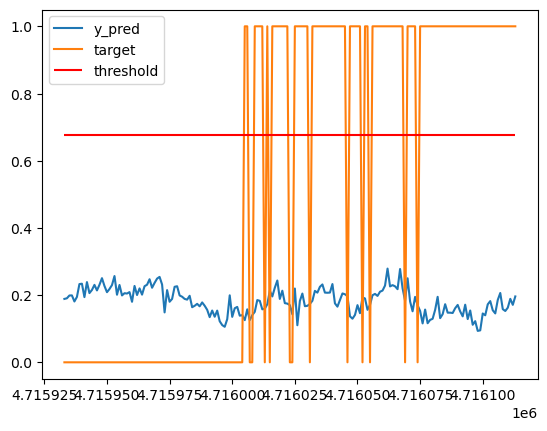

2544901
67


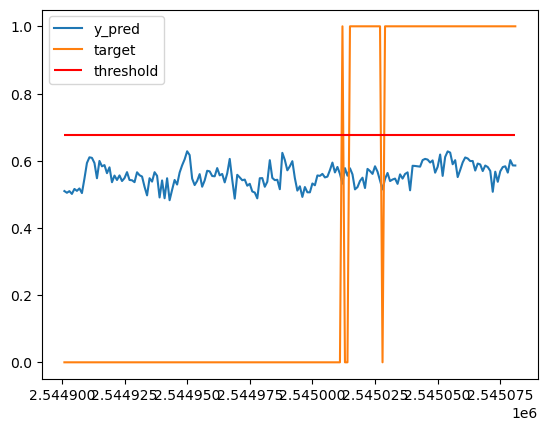

2180722
41


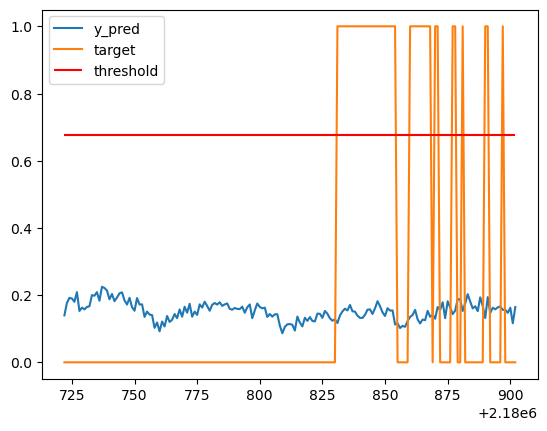

5212626
124


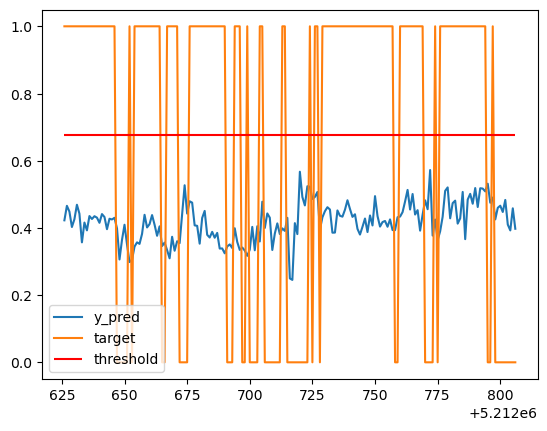

2169051
32


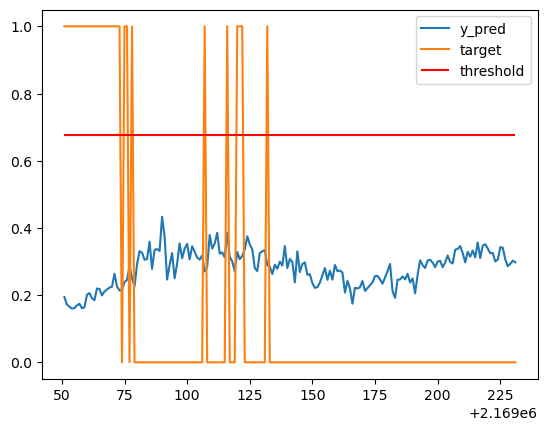

1243759
151


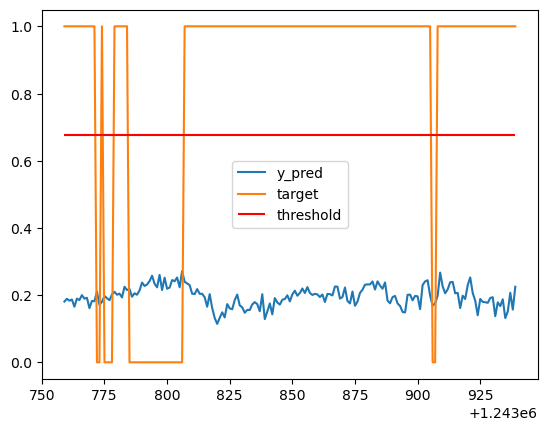

808165
180


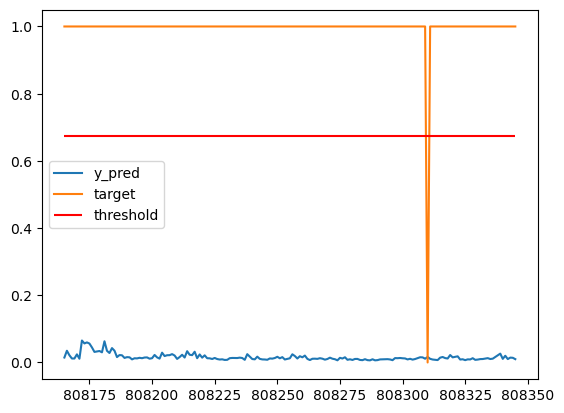

2176817
134


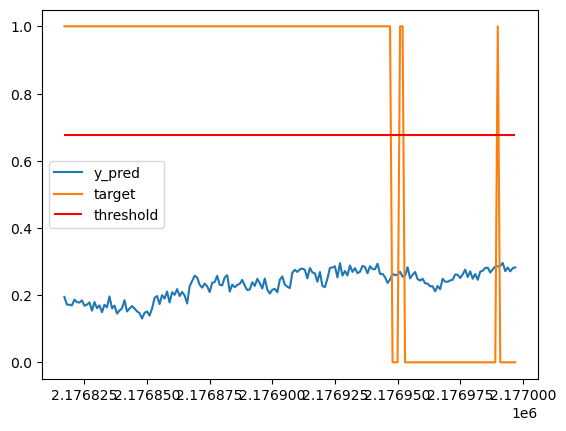

3440405
0


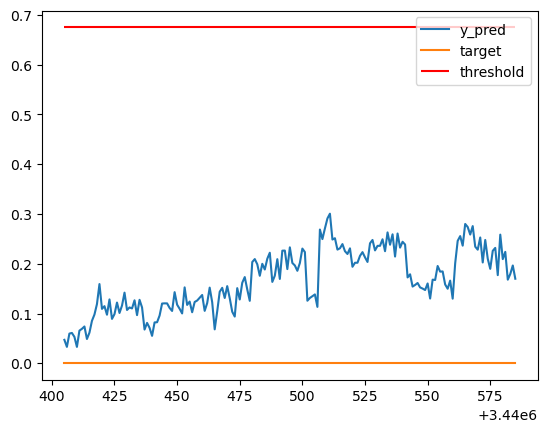

6484102
116


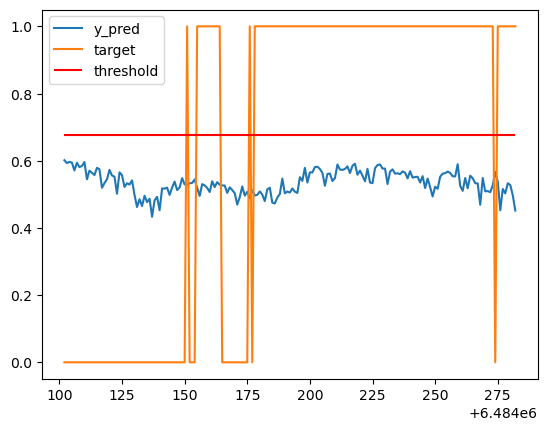

5195568
0


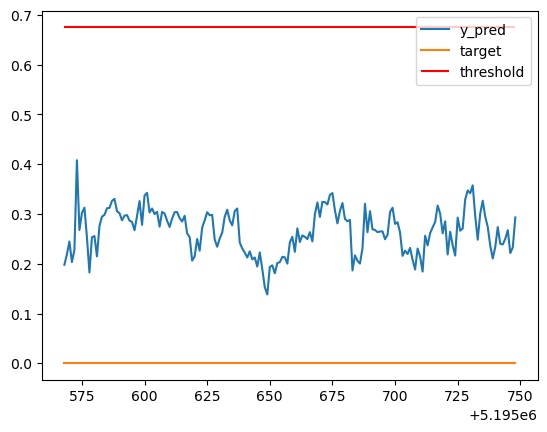

6909131
0


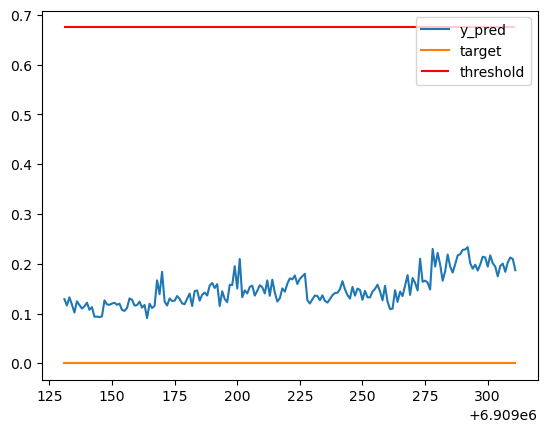

7781139
73


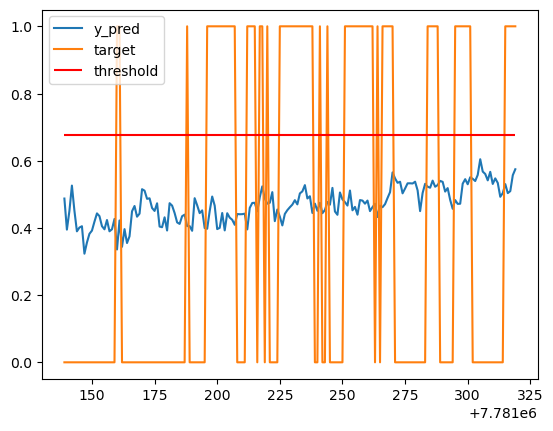

6100404
176


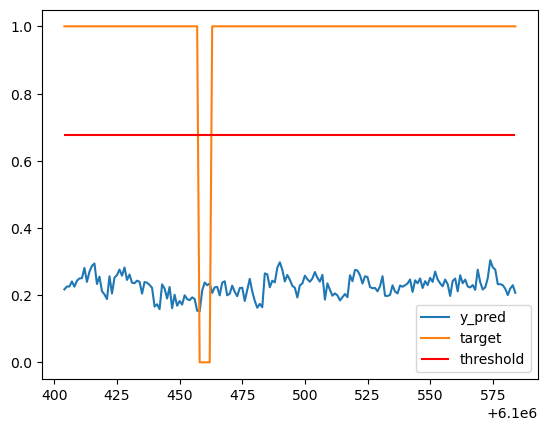

2118076
0


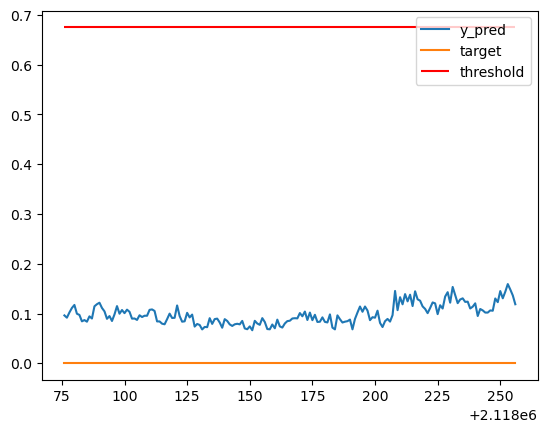

6085186
0


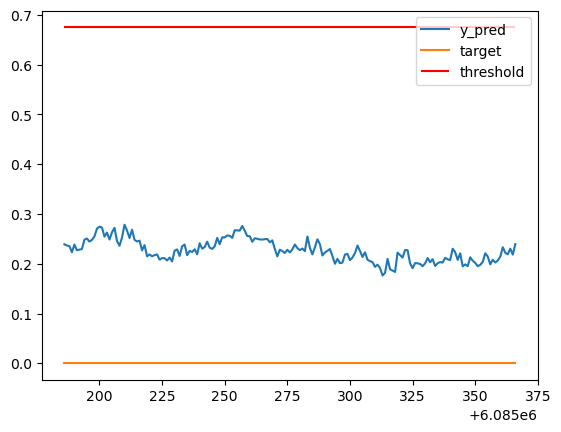

2970598
0


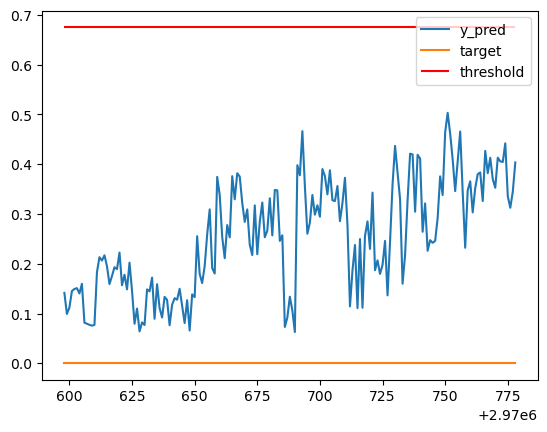

846559
0


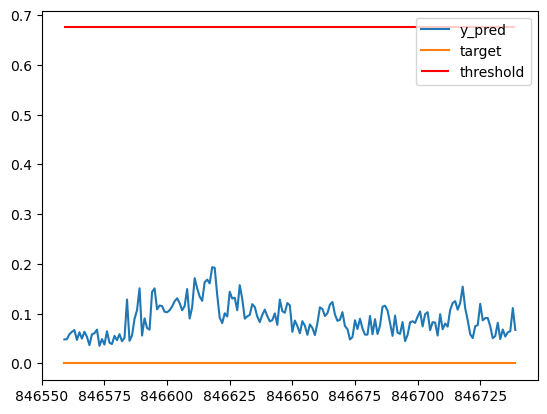

430924
12


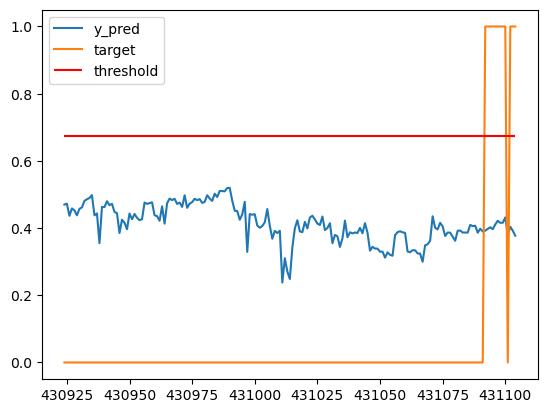

4294863
108


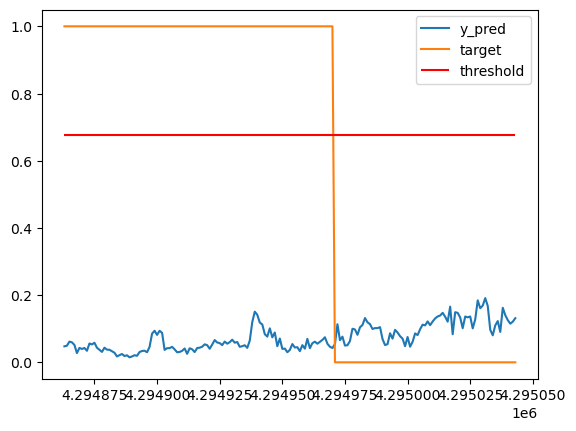

In [88]:
window = 180#неделя
for i in inds:
    print(i)
    print(df.loc[i:i+window, 'target'].sum())
    plt.plot(df.loc[i:i+window, 'y_pred'], label='y_pred')
    plt.plot(df.loc[i:i+window, 'target'], label='target')
    plt.hlines(threshold, i, i+window, color='red', label='threshold')
    plt.legend()
    plt.show()

2612801 SNGS
104


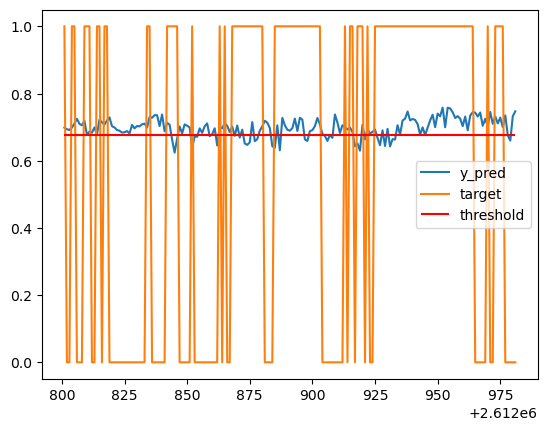

2608356 SNGS
125


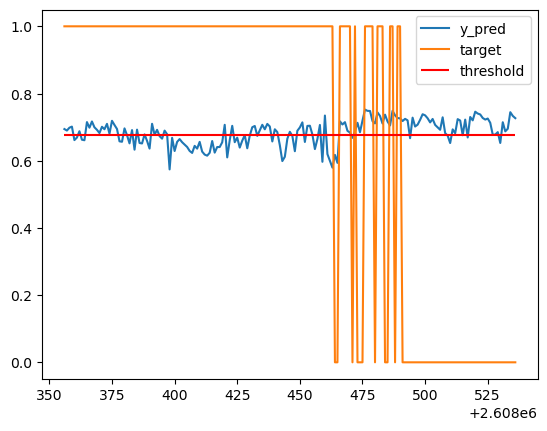

2582866 SNGS
0


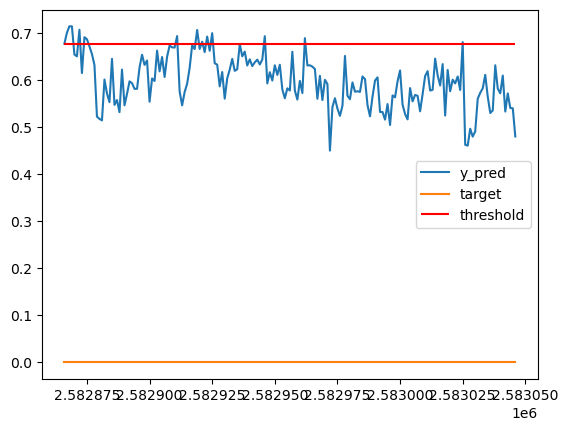

2543468 SNGS
132


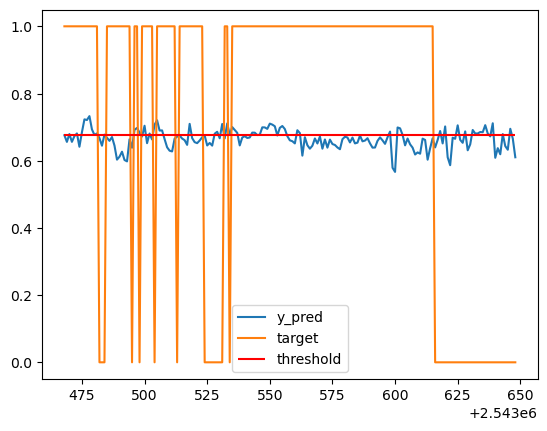

2554765 SNGS
141


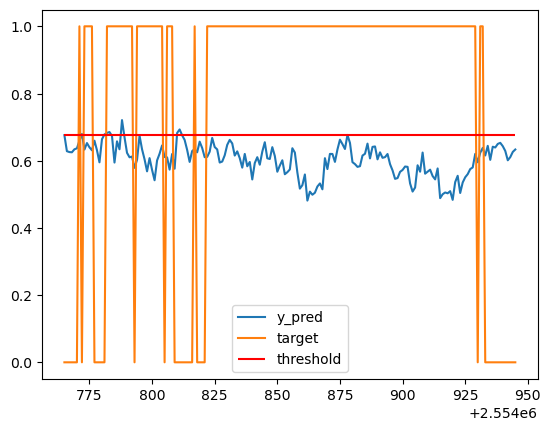

2590118 SNGS
133


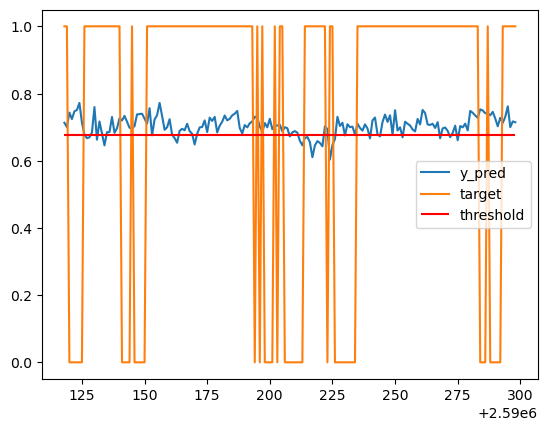

7810138 RUAL
105


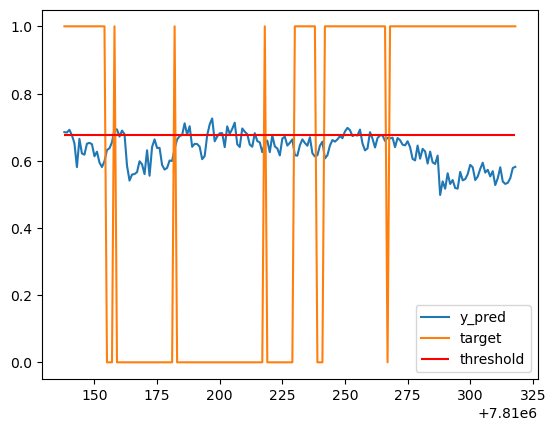

2545954 SNGS
136


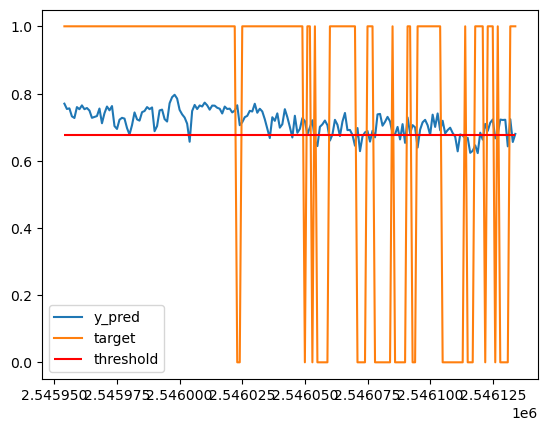

6532143 MAGN
64


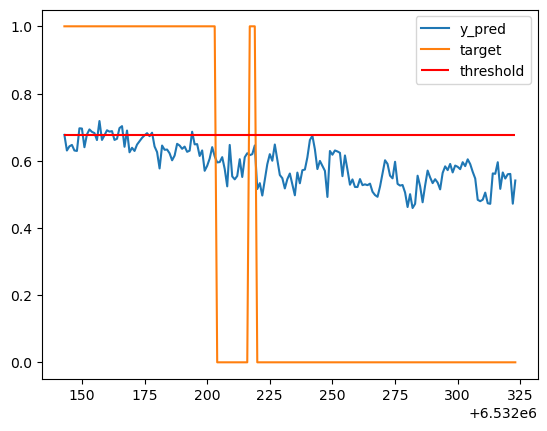

2610578 SNGS
62


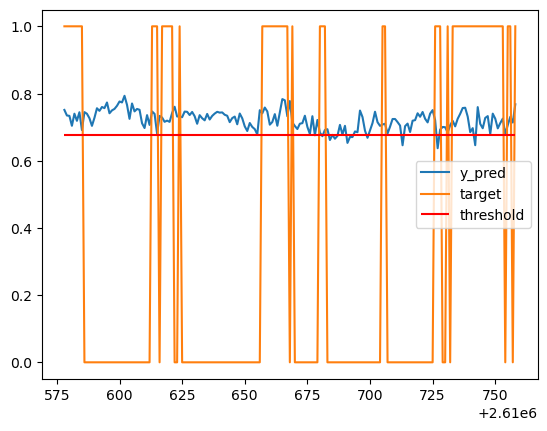

2592695 SNGS
70


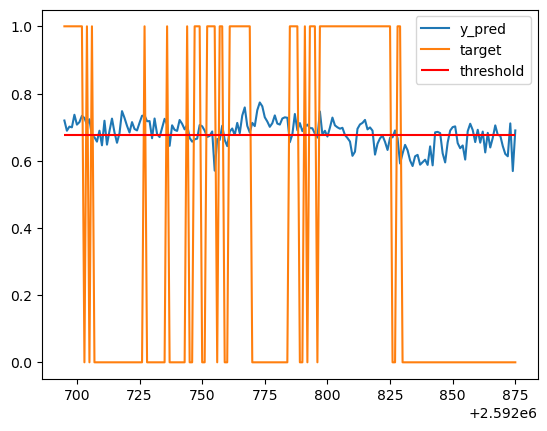

2587120 SNGS
180


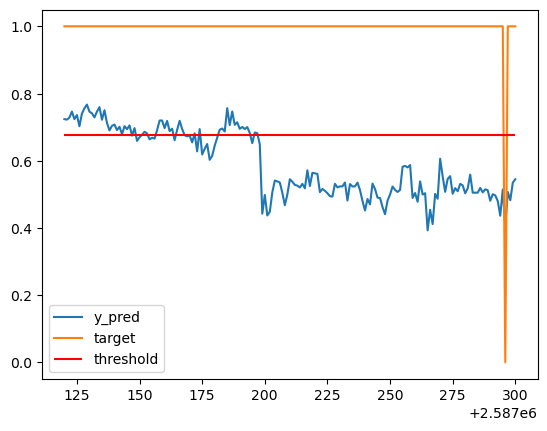

2604741 SNGS
178


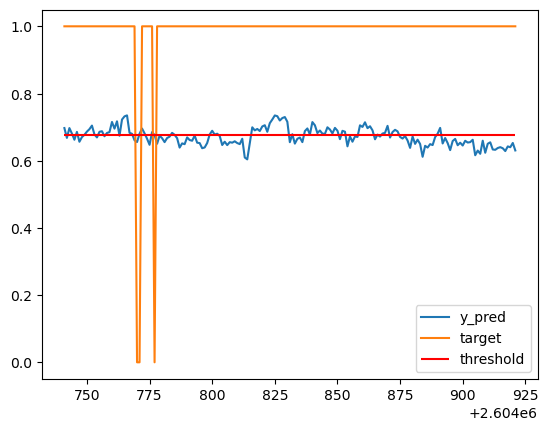

2550484 SNGS
32


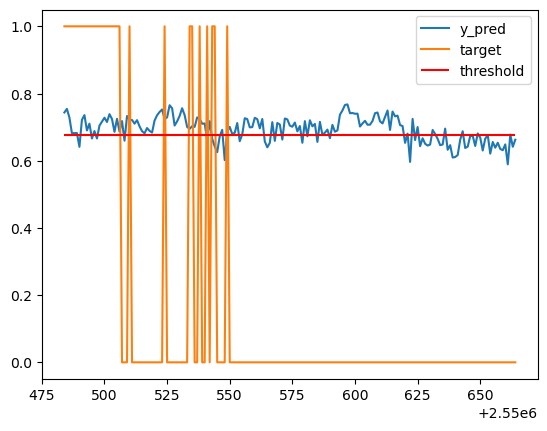

2555979 SNGS
130


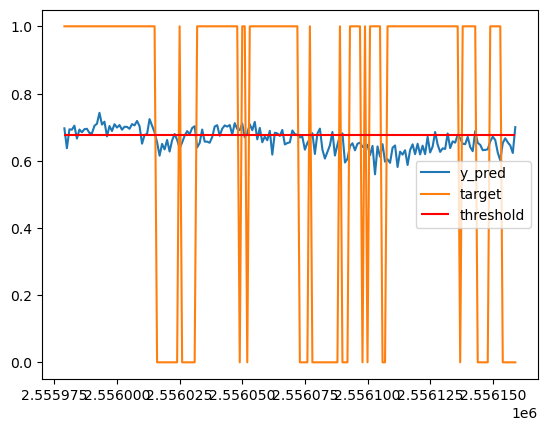

2590121 SNGS
134


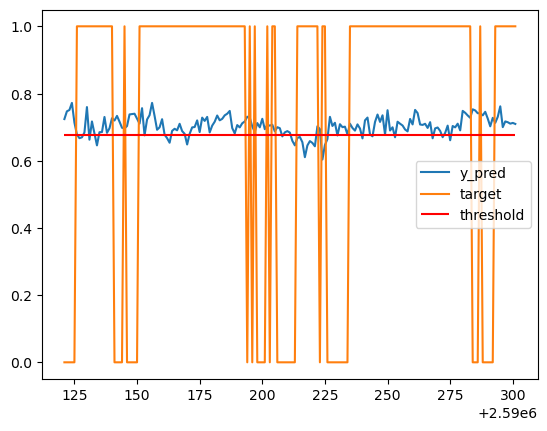

2556198 SNGS
0


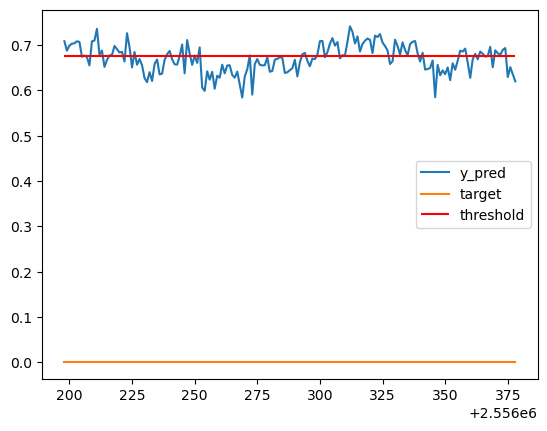

2546828 SNGS
167


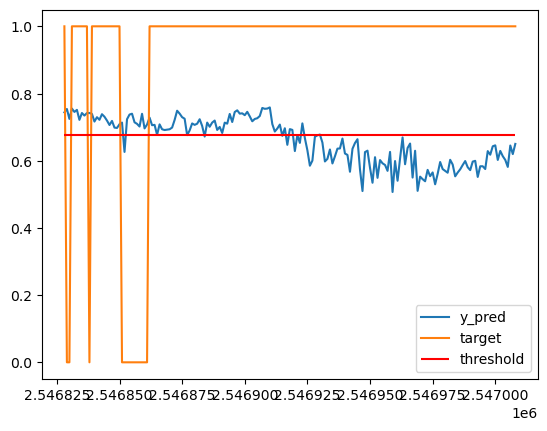

2552363 SNGS
0


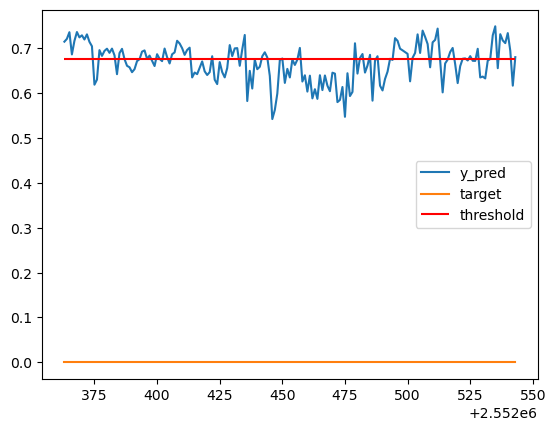

2538428 SNGS
78


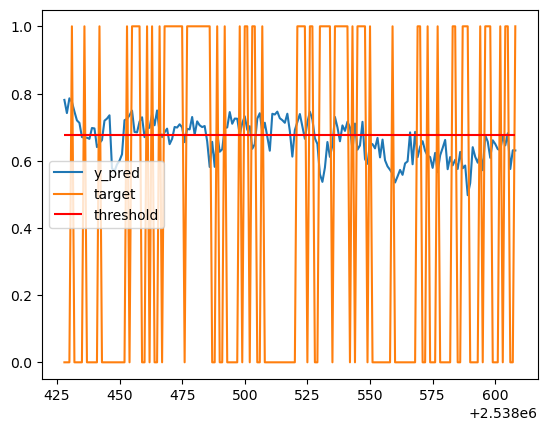

In [94]:
#bit threshold
mask = df['y_pred'] > threshold
inds = np.random.choice(df.index[(mask_valid|mask_test|mask_test2) & (mask)], size=20)


window = 180#неделя
for i in inds:
    print(i, df.loc[i, 'ticker'])
    print(df.loc[i:i+window, 'target'].sum())
    plt.plot(df.loc[i:i+window, 'y_pred'], label='y_pred')
    plt.plot(df.loc[i:i+window, 'target'], label='target')
    plt.hlines(threshold, i, i+window, color='red', label='threshold')
    plt.legend()
    plt.show()

### target24

In [428]:
# df

In [430]:
# df['result'].value_counts(normalize=True)

In [426]:
# df_result = load_pkl('./experiments/model_one_fc/df_result_wait_1day.pkl')
# df_result

In [432]:
# df_result['delta_time'] = df_result['delta_time'].replace(-1, pd.Timedelta('100 days'))
# mask = df_result['delta_time'] > pd.Timedelta('24 hours')
# df_result.loc[mask, 'result'] = 'DNF'

In [434]:
# df_result['result'].value_counts(normalize=True)

In [436]:
# df['target24'] = (df_result['result'] == 'WIN').astype(int)

In [438]:
# threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=0.99)
# mask = df['y_pred'] > threshold
# print(df.loc[mask_valid&mask, 'target24'].mean())

# threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=0.99)
# mask = df['y_pred'] > threshold
# print(df.loc[mask_test&mask, 'target24'].mean())

# threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=0.99)
# mask = df['y_pred'] > threshold
# print(df.loc[mask_test2&mask, 'target24'].mean())

### Распределение вероятностей в целом

In [96]:
import warnings
warnings.filterwarnings('ignore')


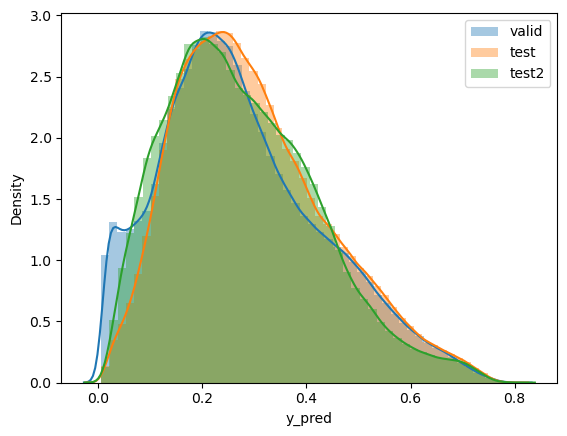

In [98]:

sns.distplot(df.loc[mask_valid, 'y_pred'], label='valid')
sns.distplot(df.loc[mask_test, 'y_pred'], label='test')
sns.distplot(df.loc[mask_test2, 'y_pred'], label='test2')
plt.legend()

In [87]:
#не так уж и плохо, есть надежды

### Распределение успеха (target) по бинам

[0.6382 0.6751]


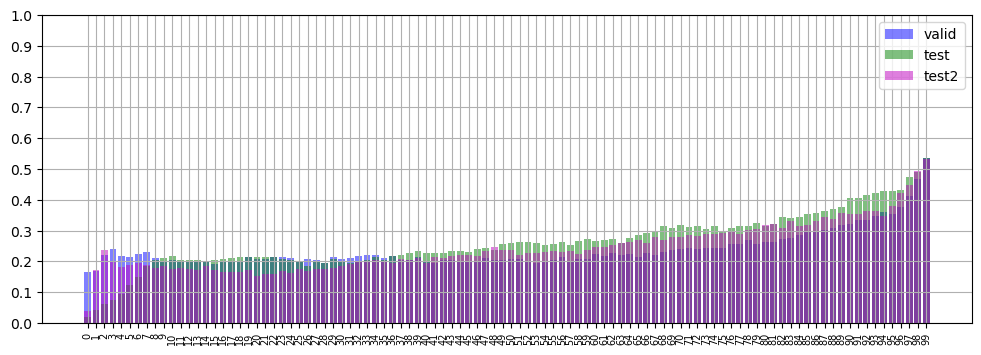

In [496]:
col_target = 'target'
q_count = 100



mask_valid = df['sample'] == 'valid'
mask_test = df['sample'] == 'test'
mask_test2 = df['sample'] == 'test2'

print(np.round(np.quantile(df.loc[mask_valid, 'y_pred'], q=[0.98, 0.99]).astype(float), decimals=4))

df['bin'] = None

df.loc[mask_valid, 'bin'] = pd.qcut(df.loc[mask_valid, 'y_pred'], q_count, labels=False)
q = pd.qcut(df.loc[mask_valid, 'y_pred'], q_count, retbins=True)[1]
#df.loc[mask_valid, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True, label='valid', color='blue', alpha=0.4)


df.loc[mask_test, 'bin'] = pd.cut(df.loc[mask_test, 'y_pred'], bins=q, labels=False, include_lowest=True)
df.loc[mask_test, 'bin'] = df.loc[mask_test, 'bin'].fillna(q_count-1)
#df.loc[mask_test, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True, label='test', color='green', alpha=0.4)


df.loc[mask_test2, 'bin'] = pd.cut(df.loc[mask_test2, 'y_pred'], bins=q, labels=False, include_lowest=True)
df.loc[mask_test2, 'bin'] = df.loc[mask_test2, 'bin'].fillna(q_count-1)
#df.loc[mask_test2, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True,label='test2', color='red', alpha=0.4)

#print
plt.figure(figsize=(12,4))
df_tmp = df.loc[mask_valid, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
plt.bar(df_tmp['bin'], df_tmp['target'], label='valid', color='blue', alpha=0.5)

df_tmp = df.loc[mask_test, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
plt.bar(df_tmp['bin'], df_tmp['target'], label='test', color='g', alpha=0.5)

df_tmp = df.loc[mask_test2, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
plt.bar(df_tmp['bin'], df_tmp['target'], label='test2', color='m', alpha=0.5)
plt.grid(visible=0.0001)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(q_count), rotation=90, size=7)
plt.legend()
plt.show()


### Распределени успеха(target24) по бинам

In [72]:
# col_target = 'target24'
# q_count = 50

# print(np.round(np.quantile(df.loc[mask_valid, 'y_pred'], q=[0.98, 0.99]).astype(float), decimals=4))

# df['bin'] = None

# df.loc[mask_valid, 'bin'] = pd.qcut(df.loc[mask_valid, 'y_pred'], q_count, labels=False)
# q = pd.qcut(df.loc[mask_valid, 'y_pred'], q_count, retbins=True)[1]
# df.loc[mask_valid, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True, label='valid', color='blue', alpha=0.4)


# df.loc[mask_test, 'bin'] = pd.cut(df.loc[mask_test, 'y_pred'], bins=q, labels=False, include_lowest=True)
# df.loc[mask_test, 'bin'] = df.loc[mask_test, 'bin'].fillna(q_count-1)
# df.loc[mask_test, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True, label='test', color='green', alpha=0.4)


# df.loc[mask_test2, 'bin'] = pd.cut(df.loc[mask_test2, 'y_pred'], bins=q, labels=False, include_lowest=True)
# df.loc[mask_test2, 'bin'] = df.loc[mask_test2, 'bin'].fillna(q_count-1)
# df.loc[mask_test2, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True,label='test2', color='red', alpha=0.4)

# plt.legend()
# plt.show()

In [103]:
pd.DataFrame(np.array([np.quantile(df.loc[mask_valid, 'y_pred'], q=np.arange(0.95, 1, 0.01)),
              np.quantile(df.loc[mask_test, 'y_pred'], q=np.arange(0.95, 1, 0.01)),
              np.quantile(df.loc[mask_test2, 'y_pred'], q=np.arange(0.95, 1, 0.01))
                       
                      ]).T)

,0,1,2
0,0.568218,0.573528,0.541263
1,0.587052,0.592525,0.563474
2,0.609923,0.615397,0.591583
3,0.638195,0.644591,0.628639
4,0.675111,0.682362,0.676875
5,0.800031,0.795631,0.807462


In [98]:
#как-то через чур хорошо

### В разрезе тикеров (внутри каждого тикера своя вероятность)

In [477]:
def distplot(df, col_target=None, q_count=None):
    for ticker in df['ticker'].unique():
        print(ticker)
        
        df_tk = df.loc[df['ticker'] == ticker].copy()

        mask_valid = df_tk['sample'] == 'valid'
        mask_test = df_tk['sample'] == 'test'
        mask_test2 = df_tk['sample'] == 'test2'

        print(np.round(np.quantile(df_tk.loc[mask_valid, 'y_pred'], q=[0.98, 0.99]).astype(float), decimals=4))
        
        sns.distplot(df_tk.loc[mask_valid, 'y_pred'], label='valid')
        sns.distplot(df_tk.loc[mask_test, 'y_pred'], label='test')
        sns.distplot(df_tk.loc[mask_test2, 'y_pred'], label='test2')
        plt.legend()
        plt.show()



        
        df_tk['bin'] = None
        
        df_tk.loc[mask_valid, 'bin'] = pd.qcut(df_tk.loc[mask_valid, 'y_pred'], q_count, labels=False)
        q = pd.qcut(df_tk.loc[mask_valid, 'y_pred'], q_count, retbins=True)[1]
        #df_tk.loc[mask_valid, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True, label='valid', color='blue', alpha=0.4)
        
        
        df_tk.loc[mask_test, 'bin'] = pd.cut(df_tk.loc[mask_test, 'y_pred'], bins=q, labels=False, include_lowest=True)
        df_tk.loc[mask_test, 'bin'] = df_tk.loc[mask_test, 'bin'].fillna(q_count-1)
        #df_tk.loc[mask_test, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True, label='test', color='green', alpha=0.4)
        
        
        df_tk.loc[mask_test2, 'bin'] = pd.cut(df_tk.loc[mask_test2, 'y_pred'], bins=q, labels=False, include_lowest=True)
        df_tk.loc[mask_test2, 'bin'] = df_tk.loc[mask_test2, 'bin'].fillna(q_count-1)
        #df_tk.loc[mask_test2, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True,label='test2', color='red', alpha=0.4)
        
        plt.figure(figsize=(12,4))

        df_tmp = df_tk.loc[mask_valid, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
        plt.bar(df_tmp['bin'], df_tmp['target'], label='valid', color='blue', alpha=0.5)
        
        df_tmp = df_tk.loc[mask_test, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
        plt.bar(df_tmp['bin'], df_tmp['target'], label='test', color='g', alpha=0.5)
        
        df_tmp = df_tk.loc[mask_test2, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
        plt.bar(df_tmp['bin'], df_tmp['target'], label='test2', color='m', alpha=0.5)
        plt.grid(visible=0.0001)
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.xticks(np.arange(q_count), rotation=90, size=7)
        plt.legend()
        plt.show()
        

### таргет4

GAZP
[0.3944 0.4167]


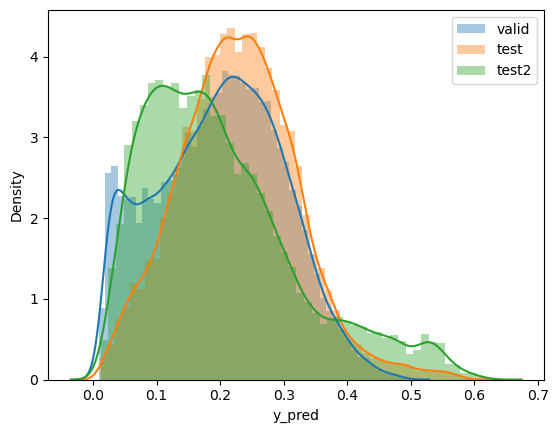

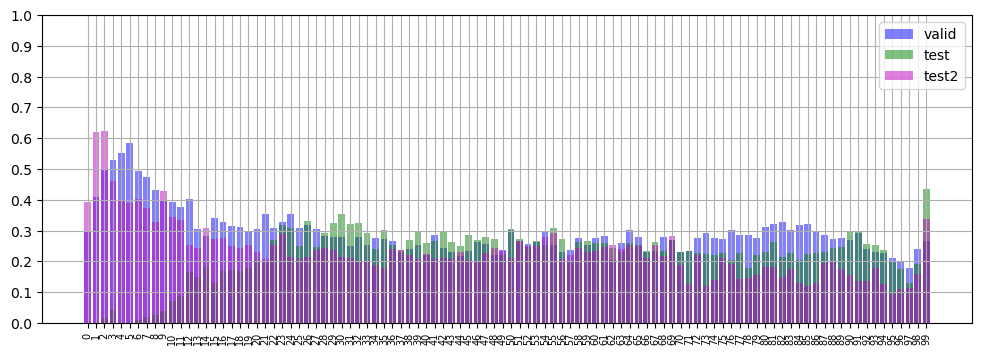

SBER
[0.3252 0.3574]


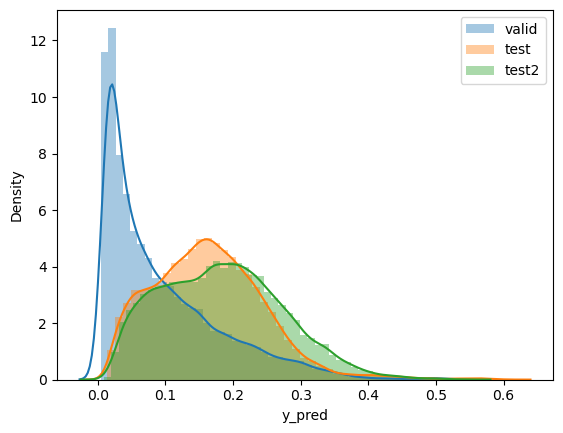

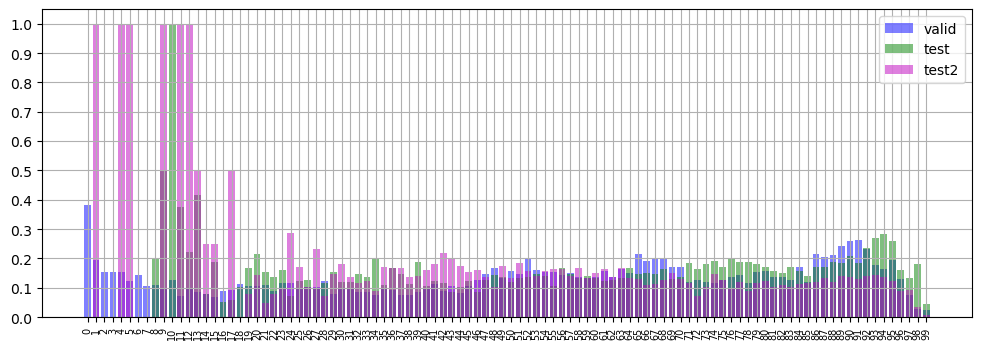

LKOH
[0.3037 0.3179]


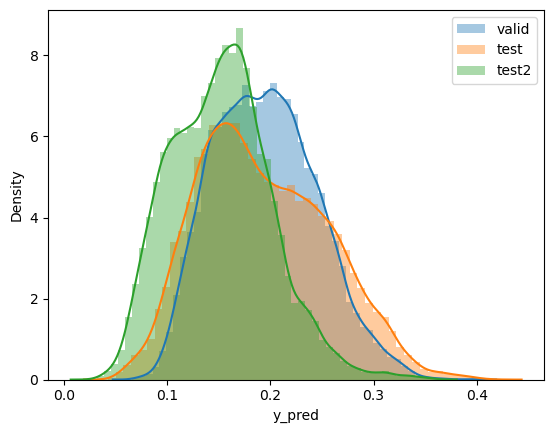

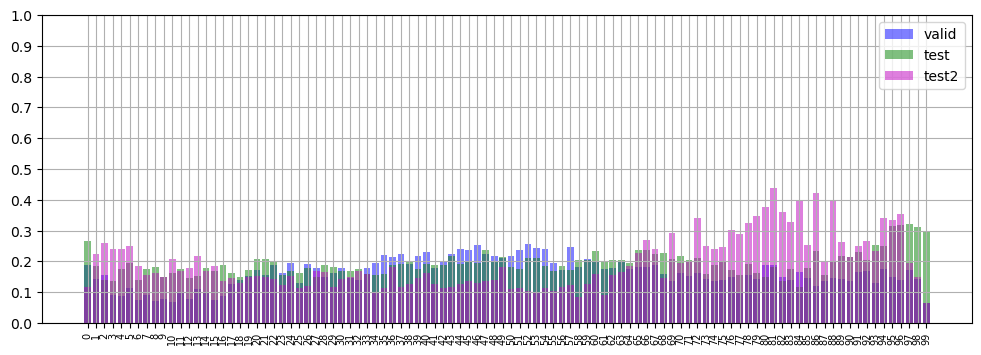

MGNT
[0.4446 0.4741]


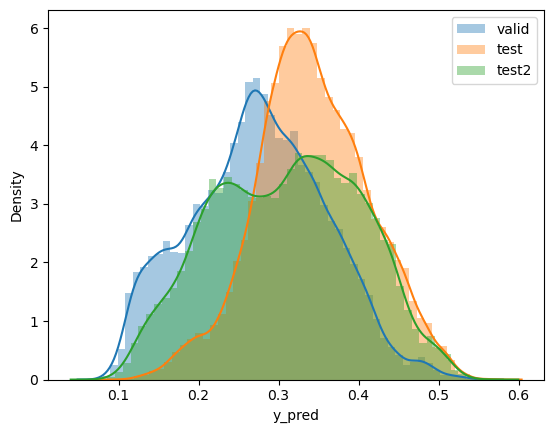

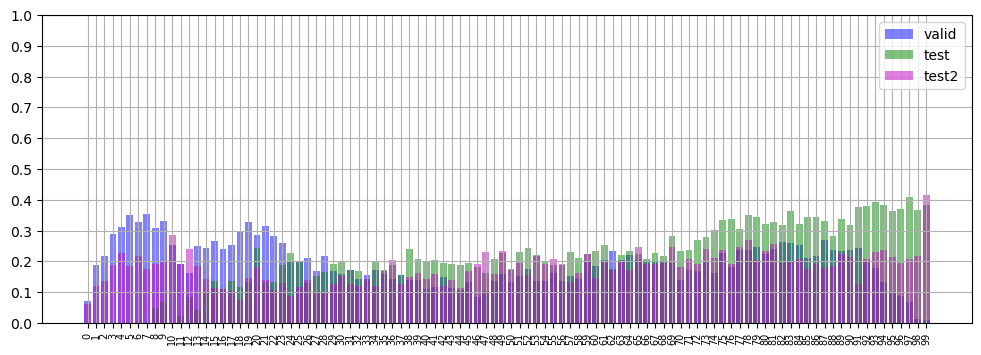

NVTK
[0.3325 0.354 ]


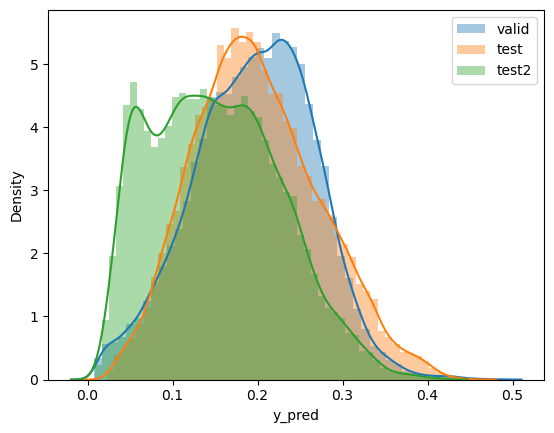

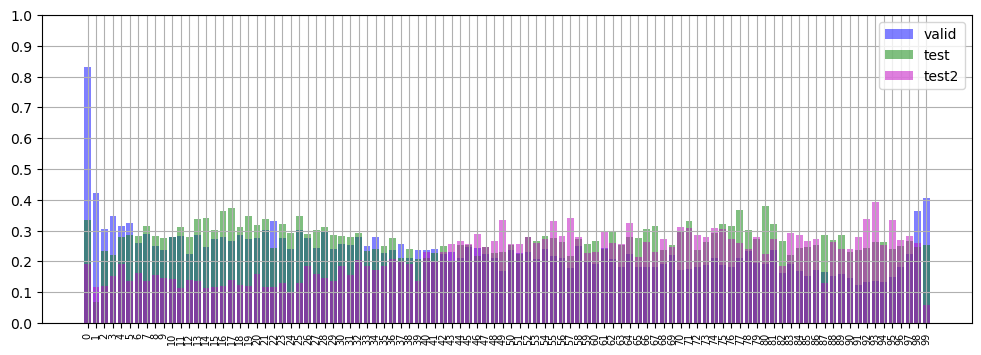

SNGS
[0.7402 0.7513]


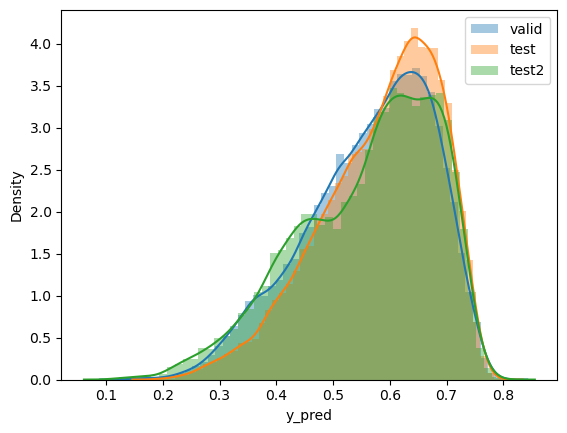

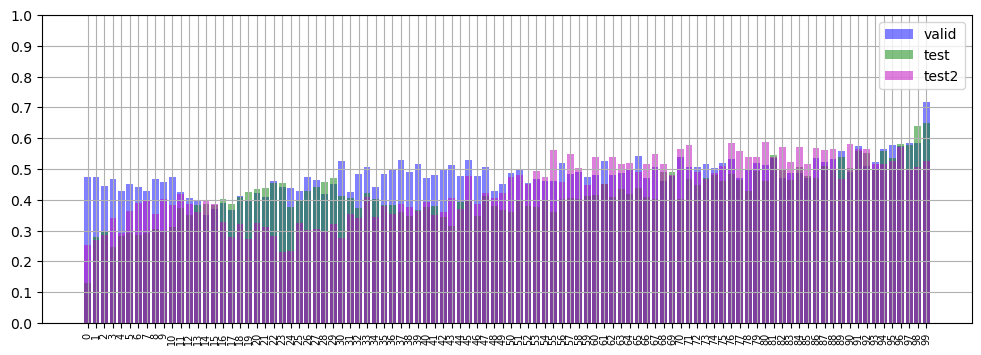

GMKN
[0.5167 0.5409]


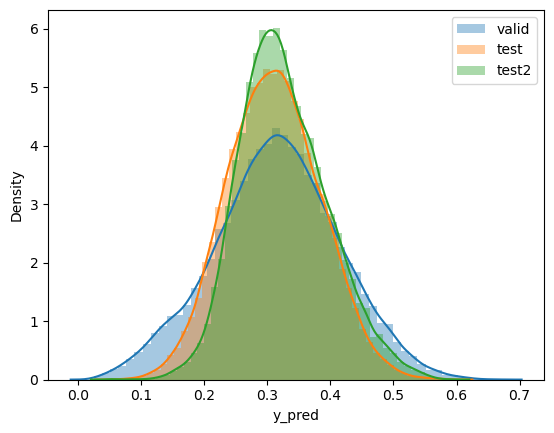

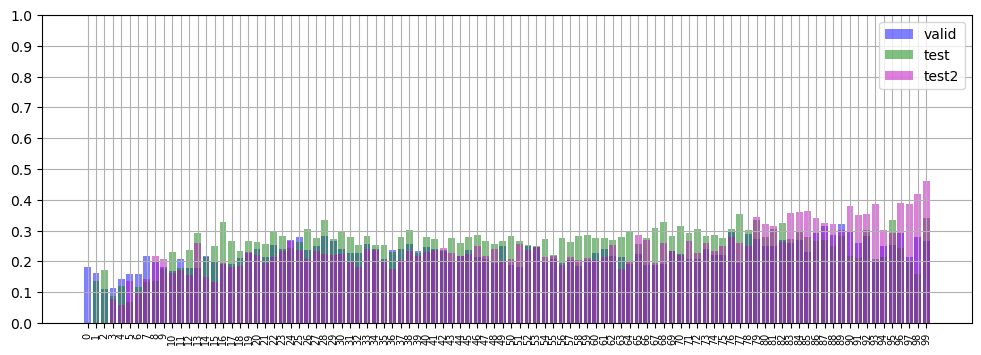

ROSN
[0.3035 0.3263]


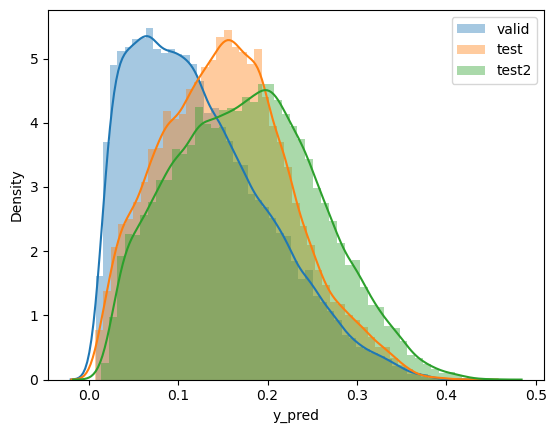

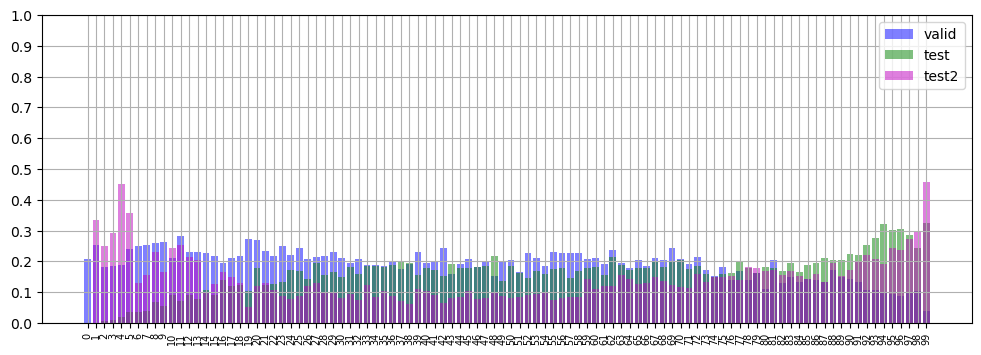

NLMK
[0.3919 0.4122]


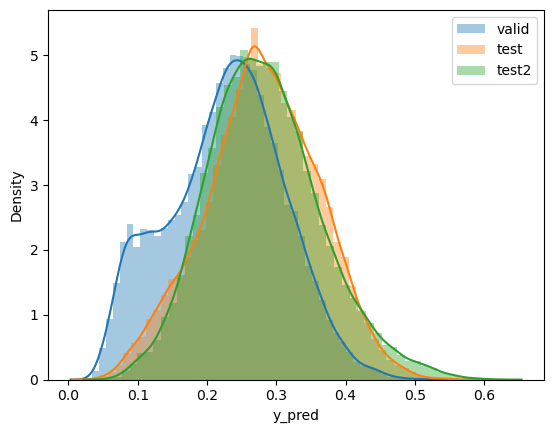

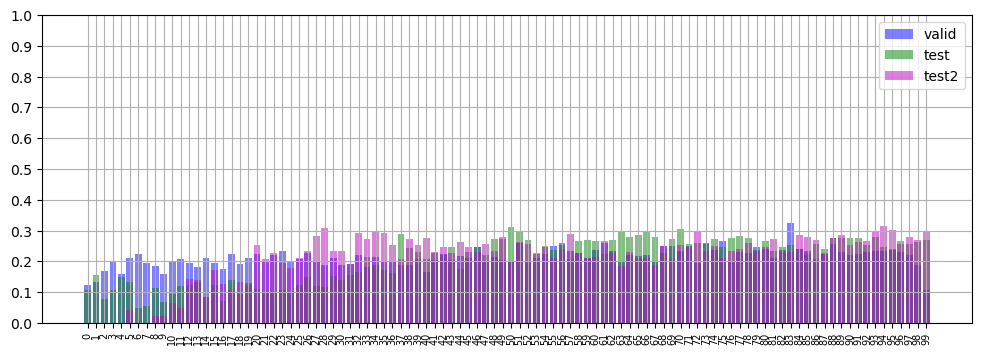

TATN
[0.4633 0.4892]


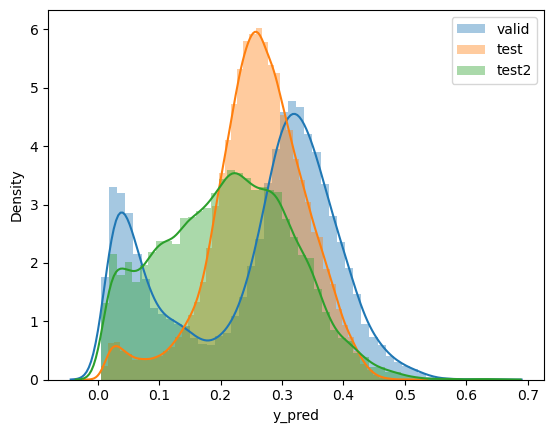

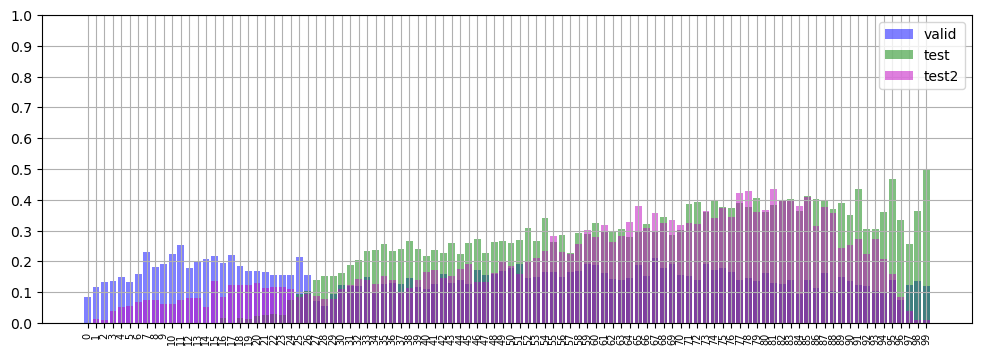

MTSS
[0.3461 0.3894]


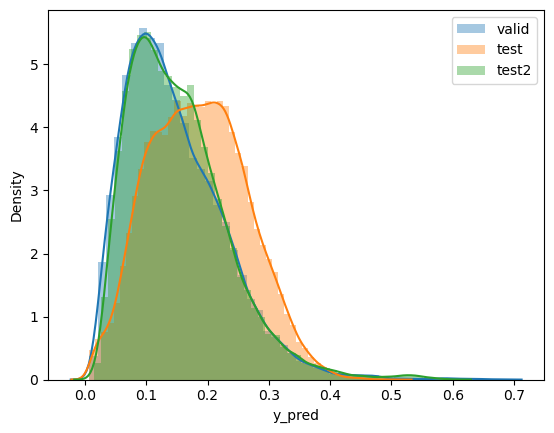

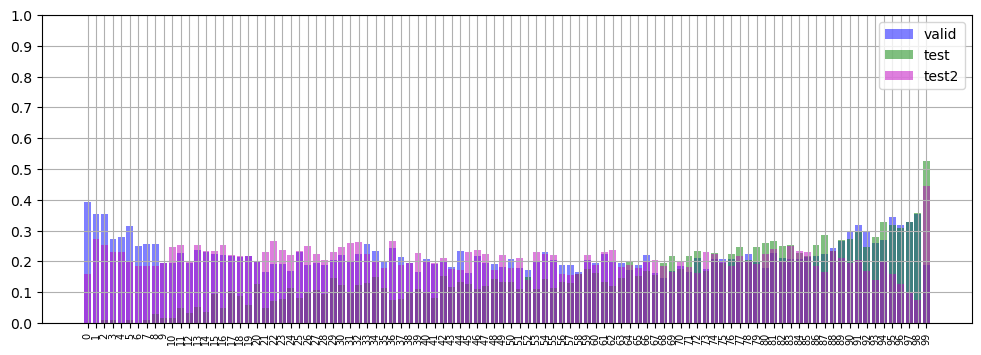

ALRS
[0.5927 0.6299]


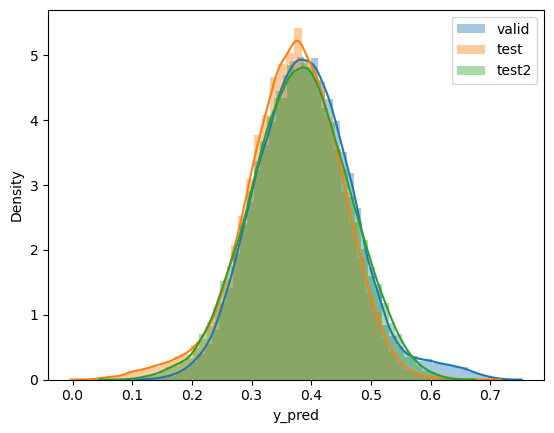

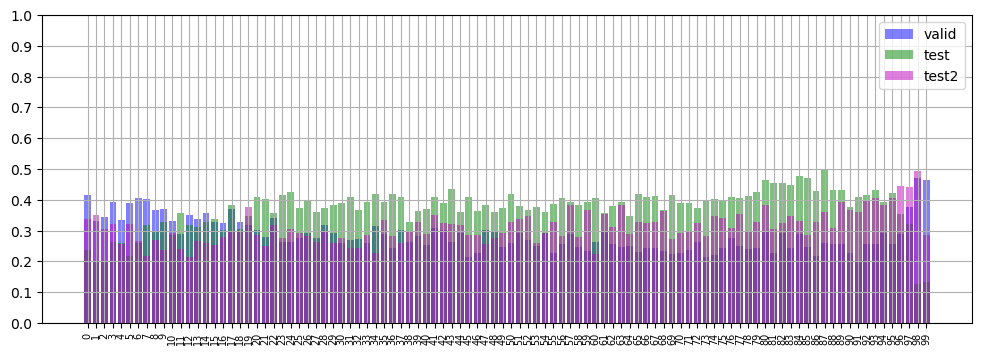

YDEX
[0.4005 0.4208]


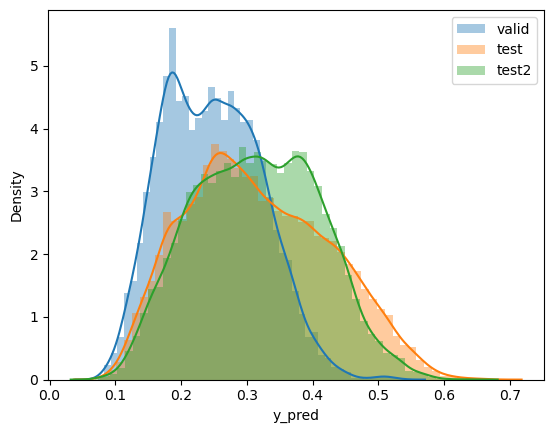

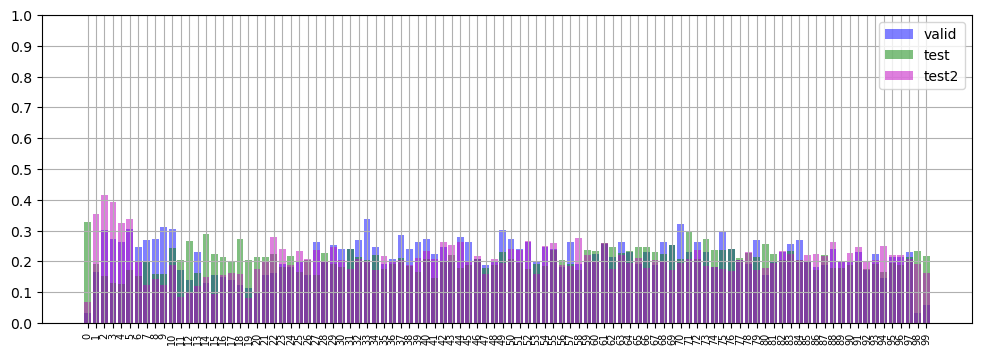

CHMF
[0.33   0.3426]


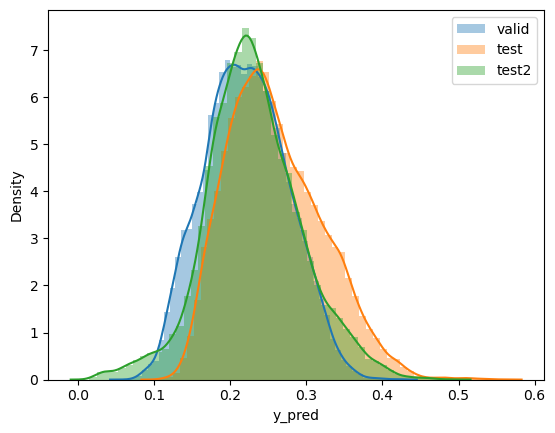

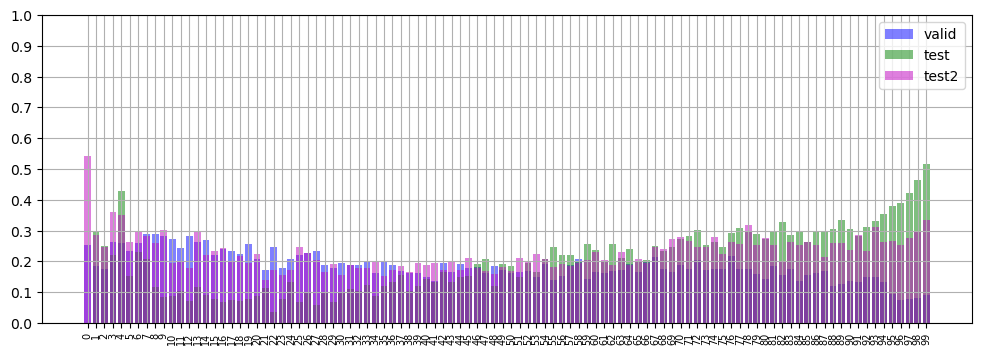

MAGN
[0.6448 0.661 ]


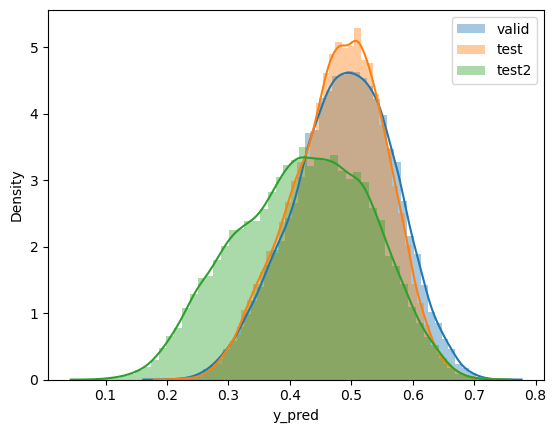

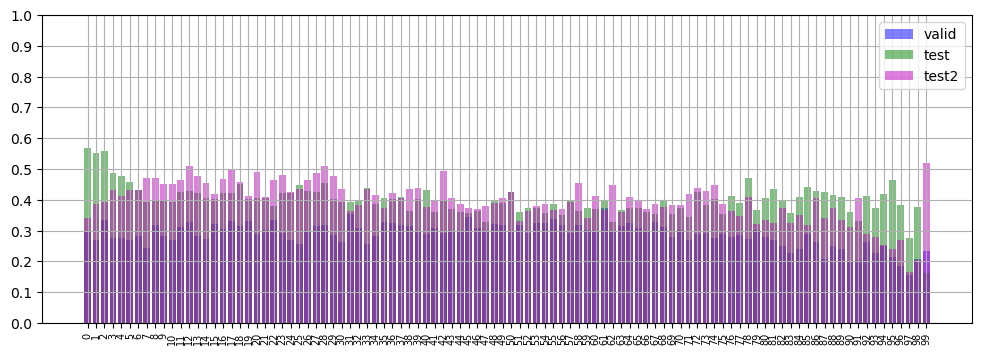

TCSG
[0.3391 0.3604]


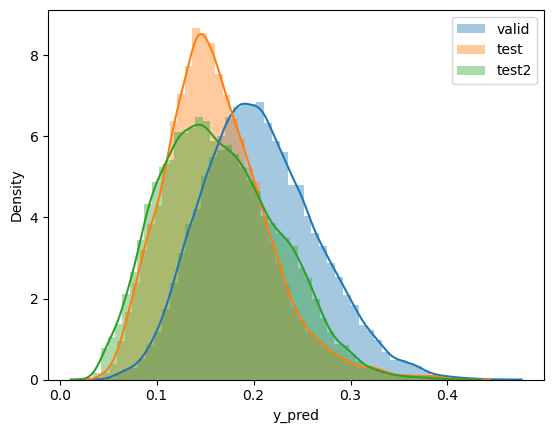

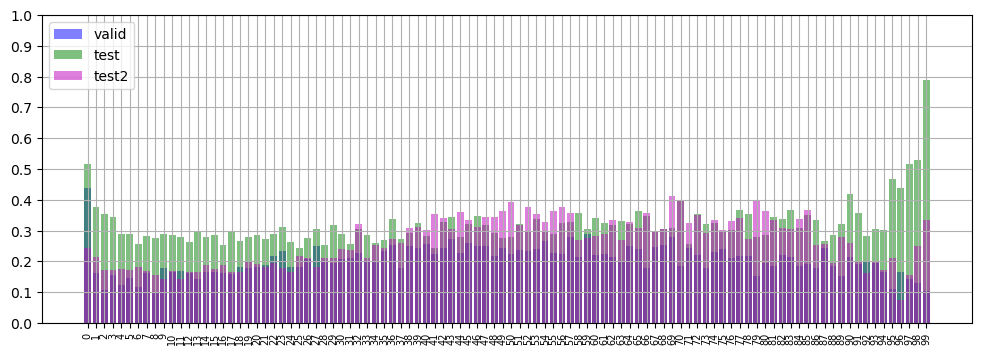

OZON
[0.5239 0.5428]


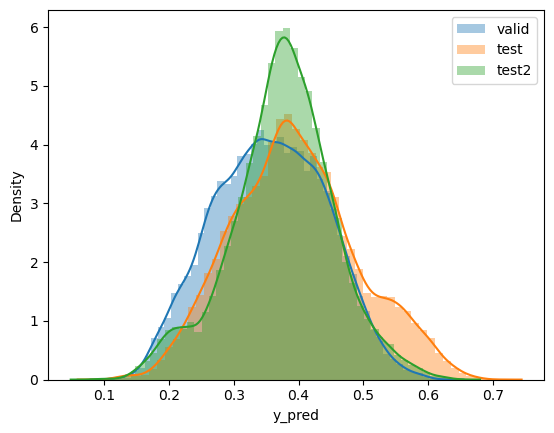

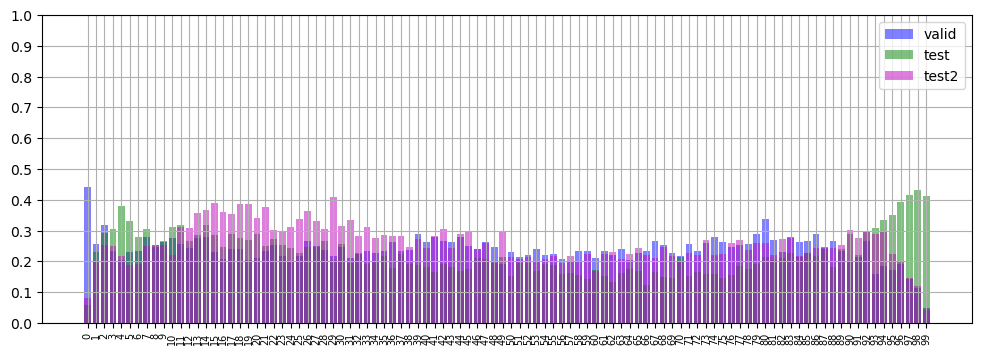

RUAL
[0.6425 0.6633]


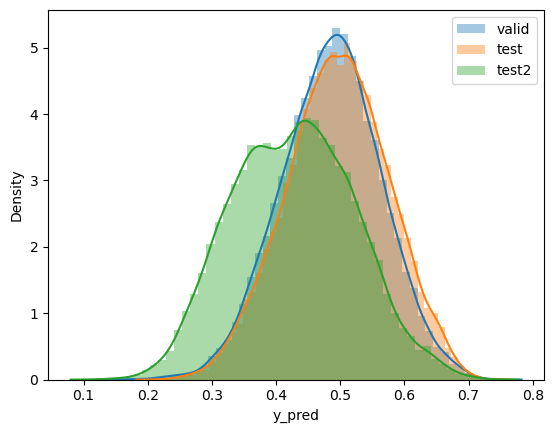

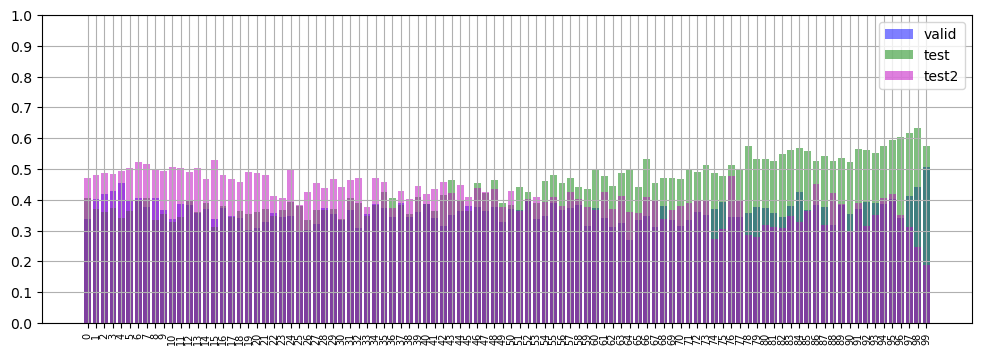

In [482]:
distplot(df, col_target='target',q_count=100)

In [ ]:
#тут фигня

### таргет24

In [359]:
#distplot(df, col_target='target24',q_count=50)

In [ ]:
#Похоже, что искать свой попрог в каждой акции не лучшая идея

### Рассмотрим общий порог для всех акций

In [470]:
def distplot_common_threshold(df, col_target=None, q_count=None):

    mask_valid = df['sample'] == 'valid'
    q = pd.qcut(df.loc[mask_valid, 'y_pred'], q_count, retbins=True)[1]
    
    for ticker in df['ticker'].unique():
        
        mask_valid = df['sample'] == 'valid'
        
        df_tk = df.loc[df['ticker'] == ticker].copy()

        mask_valid = df_tk['sample'] == 'valid'
        mask_test = df_tk['sample'] == 'test'
        mask_test2 = df_tk['sample'] == 'test2'
        




        
        df_tk['bin'] = None
        
        df_tk.loc[mask_valid, 'bin'] = pd.cut(df_tk.loc[mask_valid, 'y_pred'], bins=q, labels=False, include_lowest=True)
        df_tk.loc[mask_valid, 'bin'] = df_tk.loc[mask_valid, 'bin'].fillna(q_count-1)
        #df_tk.loc[mask_valid, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True, label='valid', color='blue', alpha=0.4)
        
        
        df_tk.loc[mask_test, 'bin'] = pd.cut(df_tk.loc[mask_test, 'y_pred'], bins=q, labels=False, include_lowest=True)
        df_tk.loc[mask_test, 'bin'] = df_tk.loc[mask_test, 'bin'].fillna(q_count-1)
        #df_tk.loc[mask_test, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True, label='test', color='green', alpha=0.4)
        
        
        df_tk.loc[mask_test2, 'bin'] = pd.cut(df_tk.loc[mask_test2, 'y_pred'], bins=q, labels=False, include_lowest=True)
        df_tk.loc[mask_test2, 'bin'] = df_tk.loc[mask_test2, 'bin'].fillna(q_count-1)
        #df_tk.loc[mask_test2, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True,label='test2', color='red', alpha=0.4)

        if (df_tk['bin'] == q_count-1).sum() > 0:
            print(ticker)
            print(np.round(np.quantile(df.loc[df['sample'] == 'valid', 'y_pred'], q=[0.98, 0.99]).astype(float), decimals=4))
    

            
            sns.distplot(df_tk.loc[mask_valid, 'y_pred'], label='valid')
            sns.distplot(df_tk.loc[mask_test, 'y_pred'], label='test')
            sns.distplot(df_tk.loc[mask_test2, 'y_pred'], label='test2')
            plt.legend()
            plt.show()
        

            
        #print
            plt.figure(figsize=(12,4))
    
            df_tmp = df_tk.loc[mask_valid, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
            plt.bar(df_tmp['bin'], df_tmp['target'], label='valid', color='blue', alpha=0.5)
            
            df_tmp = df_tk.loc[mask_test, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
            plt.bar(df_tmp['bin'], df_tmp['target'], label='test', color='g', alpha=0.5)
            
            df_tmp = df_tk.loc[mask_test2, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
            plt.bar(df_tmp['bin'], df_tmp['target'], label='test2', color='m', alpha=0.5)
            plt.grid(visible=0.0001)
            plt.yticks(np.arange(0, 1.1, 0.1))
            plt.xticks(np.arange(q_count), rotation=90, size=7)
            plt.legend()
            plt.show()

            mask_last_bin = df_tk['bin'] == q_count-1
            print(f'PRECISION: {round(df_tk.loc[mask_valid&mask_last_bin, col_target].mean(), 2)}, {round(df_tk.loc[mask_test&mask_last_bin, col_target].mean(), 2)}, {round(df_tk.loc[mask_test2&mask_last_bin, col_target].mean(), 2)}')
        
        



        
        

### общий порог, таргет

SNGS
[0.6382 0.6751]


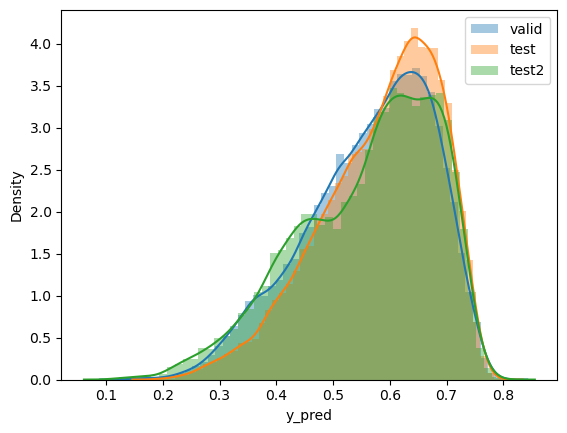

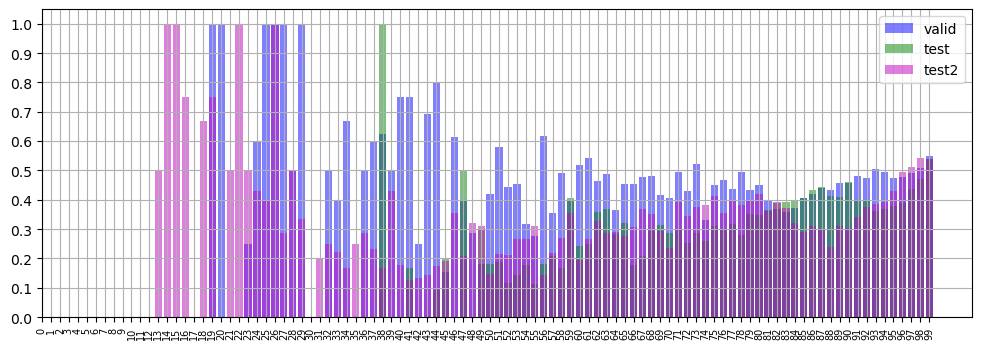

PRECISION: 0.55, 0.54, 0.54
MTSS
[0.6382 0.6751]


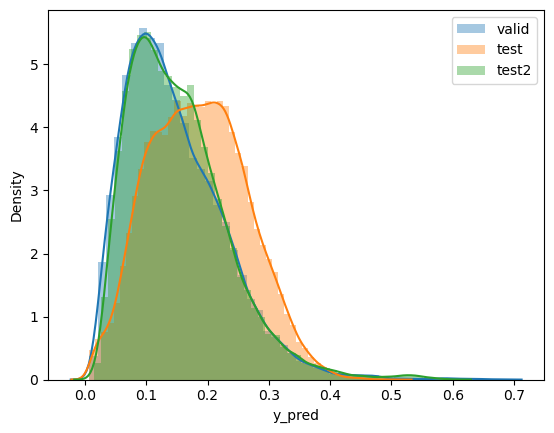

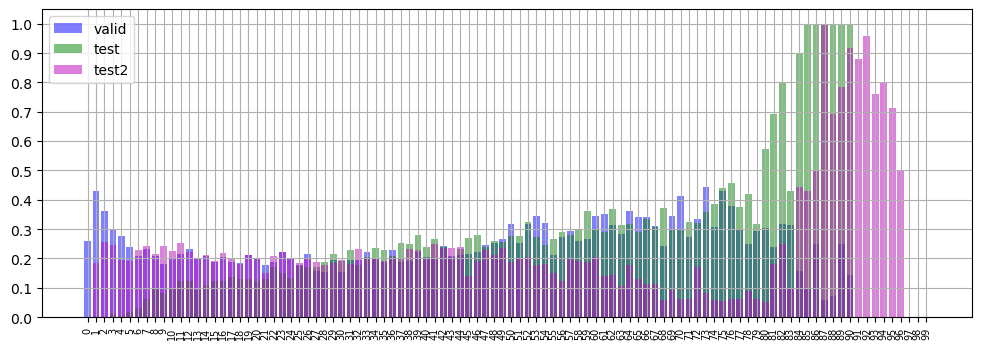

PRECISION: 0.0, nan, nan
ALRS
[0.6382 0.6751]


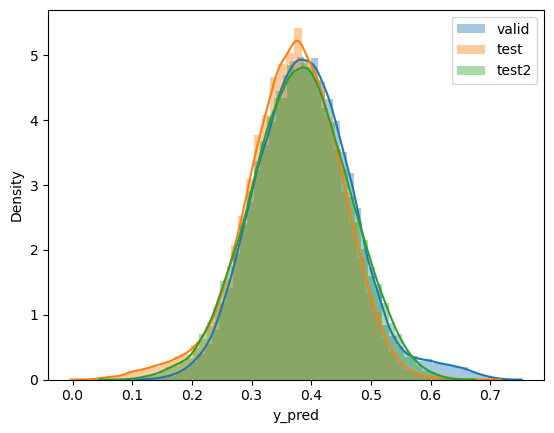

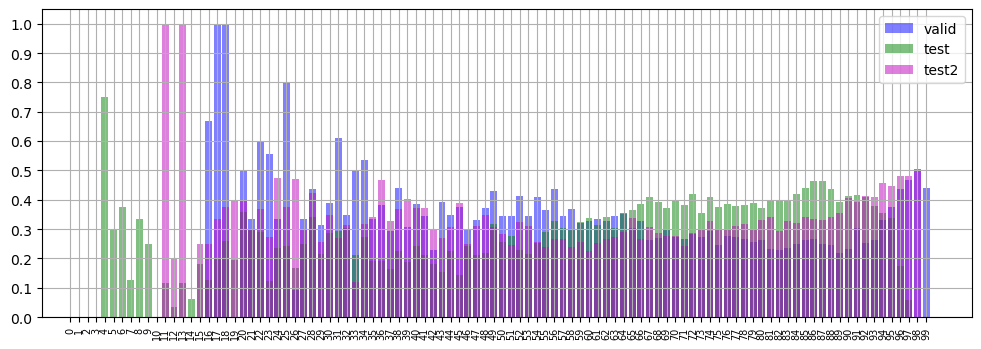

PRECISION: 0.44, 0.0, nan
YDEX
[0.6382 0.6751]


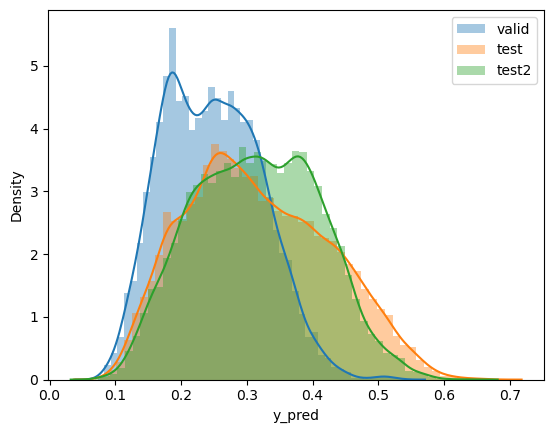

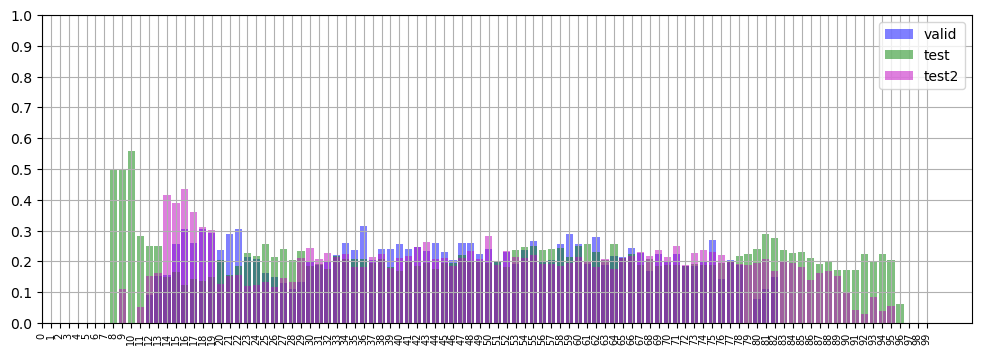

PRECISION: nan, 0.0, nan
MAGN
[0.6382 0.6751]


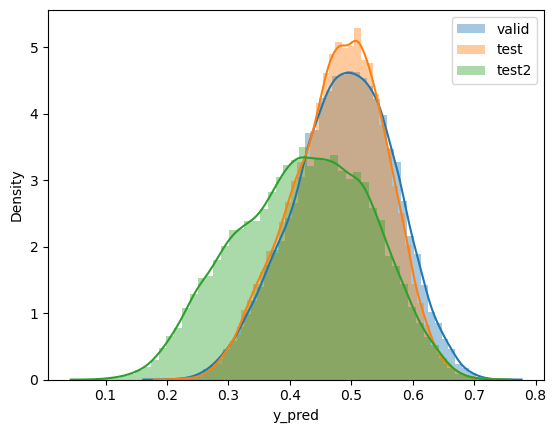

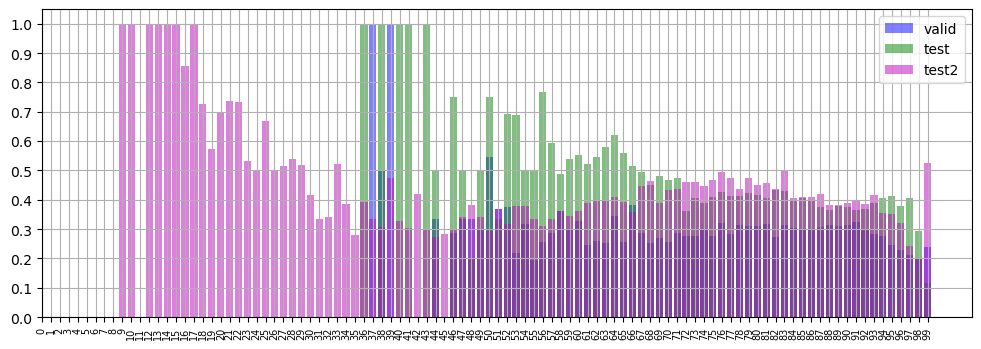

PRECISION: 0.24, 0.11, 0.52
OZON
[0.6382 0.6751]


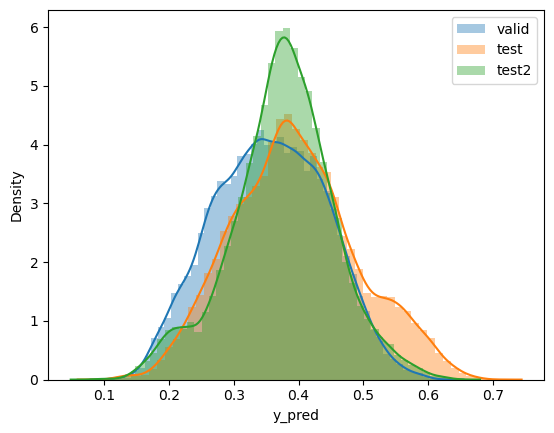

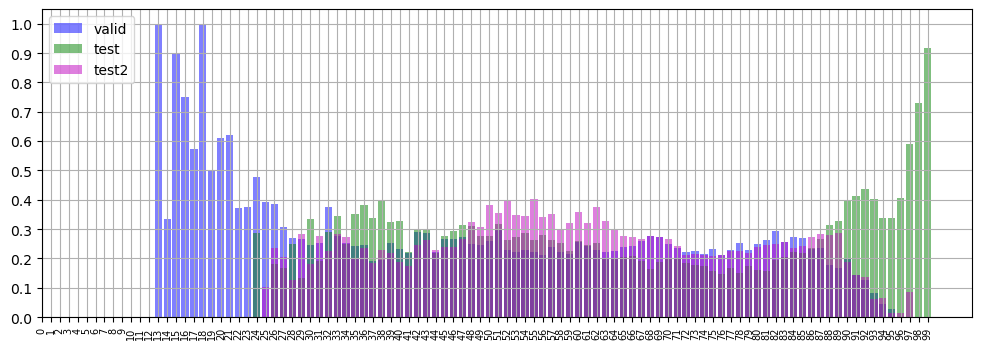

PRECISION: nan, 0.92, nan
RUAL
[0.6382 0.6751]


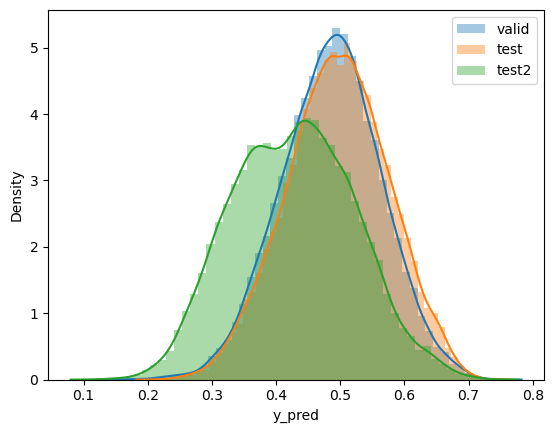

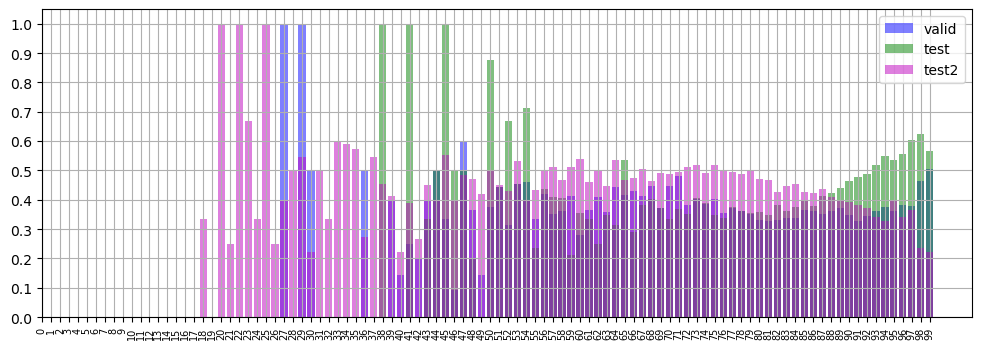

PRECISION: 0.51, 0.56, 0.22


In [475]:
distplot_common_threshold(df, col_target='target',q_count=100)

### общий порог, таргет12

In [408]:
# distplot_common_threshold(df, col_target='target24',q_count=50)

In [ ]:
#тут результаты плохие в разрезе акций

# Донастройка

In [ ]:
# По сути интересен только 99(98)-перцентиль

In [127]:
#И точек норм, магия какая-то

In [249]:
q=0.99

threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=q)
print(f'threshokd = {threshold}')

mask = df['y_pred'] > threshold
print((mask_valid&mask).sum(), df.loc[mask_valid&mask, 'target'].mean())

threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=q)
mask = df['y_pred'] > threshold
print((mask_test&mask).sum(),df.loc[mask_test&mask, 'target'].mean())

threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=q)
mask = df['y_pred'] > threshold
print((mask_test2&mask).sum(),df.loc[mask_test2&mask, 'target'].mean())

threshokd = 0.6751113641262056
5974 0.537161031134918
6210 0.544122383252818
4979 0.5342438240610564


In [254]:
threshold = np.quantile(df.loc[mask_valid, 'y_pred'], q=0.99)
print(f'threshold = {threshold}')

mask = df['y_pred'] > threshold
print((mask_valid&mask).sum(), df.loc[mask_valid&mask, 'target'].mean())

#threshold = np.quantile(df.loc[mask_test, 'y_pred'], q=0.99)
#mask = df['y_pred'] > threshold
print((mask_test&mask).sum(),df.loc[mask_test&mask, 'target'].mean())

#threshold = np.quantile(df.loc[mask_test2, 'y_pred'], q=0.99)
#mask = df['y_pred'] > threshold
print((mask_test2&mask).sum(),df.loc[mask_test2&mask, 'target'].mean())

threshold = 0.6751113641262056
5974 0.537161031134918
7287 0.5351996706463565
5156 0.5329712955779674


[0.6382 0.6751]


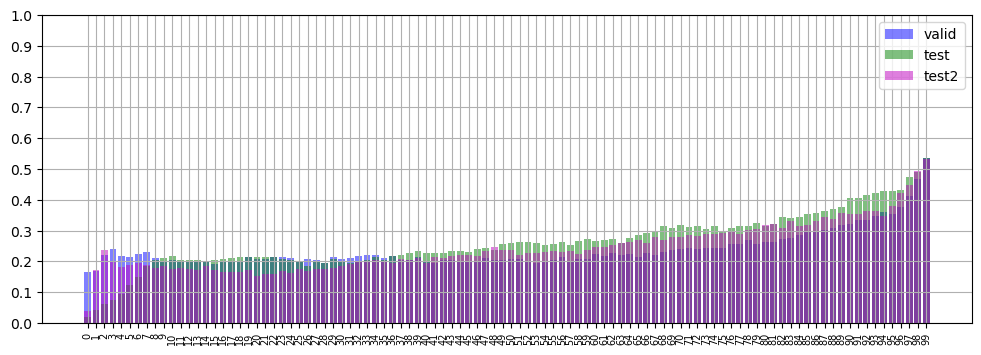

In [494]:
col_target = 'target'
q_count = 100



mask_valid = df['sample'] == 'valid'
mask_test = df['sample'] == 'test'
mask_test2 = df['sample'] == 'test2'

print(np.round(np.quantile(df.loc[mask_valid, 'y_pred'], q=[0.98, 0.99]).astype(float), decimals=4))

df['bin'] = None

df.loc[mask_valid, 'bin'] = pd.qcut(df.loc[mask_valid, 'y_pred'], q_count, labels=False)
q = pd.qcut(df.loc[mask_valid, 'y_pred'], q_count, retbins=True)[1]
#df.loc[mask_valid, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True, label='valid', color='blue', alpha=0.4)


df.loc[mask_test, 'bin'] = pd.cut(df.loc[mask_test, 'y_pred'], bins=q, labels=False, include_lowest=True)
df.loc[mask_test, 'bin'] = df.loc[mask_test, 'bin'].fillna(q_count-1)
#df.loc[mask_test, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True, label='test', color='green', alpha=0.4)


df.loc[mask_test2, 'bin'] = pd.cut(df.loc[mask_test2, 'y_pred'], bins=q, labels=False, include_lowest=True)
df.loc[mask_test2, 'bin'] = df.loc[mask_test2, 'bin'].fillna(q_count-1)
#df.loc[mask_test2, ['bin', col_target]].groupby('bin')[col_target].mean().plot.bar(sharex=True,label='test2', color='red', alpha=0.4)

#print
plt.figure(figsize=(12,4))
df_tmp = df.loc[mask_valid, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
plt.bar(df_tmp['bin'], df_tmp['target'], label='valid', color='blue', alpha=0.5)

df_tmp = df.loc[mask_test, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
plt.bar(df_tmp['bin'], df_tmp['target'], label='test', color='g', alpha=0.5)

df_tmp = df.loc[mask_test2, ['bin', col_target]].groupby('bin')[col_target].mean().reset_index()
plt.bar(df_tmp['bin'], df_tmp['target'], label='test2', color='m', alpha=0.5)
plt.grid(visible=0.0001)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(q_count), rotation=90, size=7)
plt.legend()
plt.show()


In [154]:
def exp_smoothing(df, col_target, alpha, q=0.99):
    mask = df['sample'].notnull()
    y_pred = np.array(df.loc[mask, 'y_pred']).copy()

    mask_valid = df['sample'] == 'valid'
    mask_test = df['sample'] == 'test'
    mask_test2 = df['sample'] == 'test2'
    
    for i in range(1, y_pred.shape[0]):
        y_pred[i] = (1-alpha)*y_pred[i-1] + alpha*y_pred[i]
    
    df['y_pred_exp'] = None
    df.loc[mask, 'y_pred_exp'] = y_pred


    
    threshold = np.quantile(df.loc[mask_valid, 'y_pred_exp'], q=q)
    mask_last_bin = df['y_pred_exp'] > threshold
    
    print(f'ALPHA = {round(alpha,3)}, PRECISION: {round(df.loc[mask_valid&mask_last_bin, col_target].mean(), 2)}, {round(df.loc[mask_test&mask_last_bin, col_target].mean(), 2)}, {round(df.loc[mask_test2&mask_last_bin, col_target].mean(), 2)}')
    

### таргет

In [183]:
for alpha in np.arange(0.1, 1.1, 0.1):
    exp_smoothing(df, 'target', alpha, q=0.99)

ALPHA = 0.1, PRECISION: 0.53, 0.53, 0.54
ALPHA = 0.2, PRECISION: 0.54, 0.54, 0.54
ALPHA = 0.3, PRECISION: 0.54, 0.54, 0.54
ALPHA = 0.4, PRECISION: 0.54, 0.54, 0.54
ALPHA = 0.5, PRECISION: 0.54, 0.54, 0.54
ALPHA = 0.6, PRECISION: 0.54, 0.54, 0.54
ALPHA = 0.7, PRECISION: 0.54, 0.54, 0.54
ALPHA = 0.8, PRECISION: 0.54, 0.54, 0.54
ALPHA = 0.9, PRECISION: 0.54, 0.54, 0.53
ALPHA = 1.0, PRECISION: 0.54, 0.54, 0.53


In [171]:
# for alpha in np.arange(0.01, 1, 0.01):
#     exp_smoothing(df, 'target', alpha, q=0.99)

In [166]:
# for alpha in np.arange(0.005, 0.05, 0.005):
#     exp_smoothing(df, 'target', alpha, q=0.995)

In [167]:
# for alpha in np.arange(0.001, 0.011, 0.001):
#     exp_smoothing(df, 'target', alpha, q=0.995)

In [ ]:
#ALPHA = 0.005, PRECISION: 0.43, 0.42, 0.56

In [ ]:
#И сколько их в день интересно? И на каких акциях?

In [185]:
exp_smoothing(df, 'target', 0.8, q=0.99)

ALPHA = 0.8, PRECISION: 0.54, 0.54, 0.54


In [187]:
mask_valid = df['sample'] == 'valid'
threshold = np.quantile(df.loc[mask_valid, 'y_pred_exp'], q=0.99)
threshold

0.6730552890421255

In [189]:
mask_threshold = df['y_pred_exp']  > threshold

In [191]:
mask_test = df['sample'] == 'test'
mask_test2 = df['sample'] == 'test2'

df.loc[mask_valid&mask_threshold].shape[0], df.loc[mask_test&mask_threshold].shape[0], df.loc[mask_test2&mask_threshold].shape[0]

(5974, 7429, 5260)

In [193]:
df.loc[mask_valid&mask_threshold, 'time'].dt.date.nunique(), df.loc[mask_test&mask_threshold, 'time'].dt.date.nunique(), df.loc[mask_test2&mask_threshold, 'time'].dt.date.nunique()

(38, 43, 25)

In [195]:
df.loc[mask_valid&mask_threshold, 'ticker'].unique(), df.loc[mask_test&mask_threshold, 'ticker'].unique(), df.loc[mask_test2&mask_threshold, 'ticker'].unique()

(array(['SNGS', 'ALRS', 'MAGN', 'RUAL'], dtype=object),
 array(['SNGS', 'ALRS', 'MAGN', 'OZON', 'RUAL'], dtype=object),
 array(['SNGS', 'MAGN', 'RUAL'], dtype=object))

In [ ]:
#SGNS, MAGN, RUAL

### таргет (доп для моделей <1 дня)

In [148]:
# for alpha in np.arange(0.1, 1.1, 0.1):
#     exp_smoothing(df, 'target24', alpha, q=0.995)

In [150]:
# for alpha in np.arange(0.01, 0.11, 0.01):
#     exp_smoothing(df, 'target24', alpha, q=0.995)

In [152]:
# for alpha in np.arange(0.001, 0.011, 0.001):
#     exp_smoothing(df, 'target24', alpha, q=0.995)

In [ ]:
#ALPHA = 0.005, PRECISION: 0.53, 0.55, 0.58